In [40]:
from model.data_handler import *

from model.optimizer import *
from model.interactor.impl.decision_tree_interactor import *
from model.interactor.impl.random_forest_interactor import *
from model.interactor.impl.ada_boost_interactor import *
from model.interactor.library.decision_tree_interactor_lib import *
from model.interactor.library.random_forest_interactor_lib import *
from model.interactor.library.ada_boost_interactor_lib import *
from model.params.partition_crit import *

ultraviolet = '#9A00F5'
pure_aqua = '#00FFFF'
neon_red = '#FF005D'
mint = '#04FF82'

In [2]:
handler = DataHandler('data/reduced_01-10-23__01-03-24.csv', 'document_type')
handler.data.head()

,projectId,department,document_type,title,progress,views,project_card_size_Kb
0,146100,Минздрав России,Проект постановления Правительства Российской ...,О внесении изменений в постановление Правитель...,1.0,315,0.354492
1,146099,Минздрав России,Проект постановления Правительства Российской ...,О внесении изменений в постановление Правитель...,1.0,358,0.354492
2,146098,Минздрав России,Проект ведомственного акта,Об утверждении общих требований к организации ...,1.0,556,0.367188
3,146097,Минздрав России,Проект ведомственного акта,Об утверждении Порядка оповещения законного пр...,1.0,350,0.582031
4,146095,Минсельхоз России,Проект постановления Правительства Российской ...,О внесении изменения в постановление Правитель...,1.0,253,0.359375


In [3]:
handler.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   projectId             712 non-null    int64  
 1   department            712 non-null    object 
 2   document_type         712 non-null    object 
 3   title                 712 non-null    object 
 4   progress              712 non-null    float64
 5   views                 712 non-null    int64  
 6   project_card_size_Kb  712 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 39.1+ KB


In [4]:
print(handler.data['document_type'].unique())
print(handler.data['document_type'].unique().__len__())
handler.drop_cols(['projectId', 'project_card_size_Kb'])
handler.working_copy.info()

['Проект постановления Правительства Российской Федерации'
 'Проект ведомственного акта' 'Проект федерального закона'
 'Проект Указа Президента Российской Федерации'
 'Распоряжение правительства РФ']
5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     712 non-null    object 
 1   document_type  712 non-null    object 
 2   title          712 non-null    object 
 3   progress       712 non-null    float64
 4   views          712 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 27.9+ KB


In [5]:
handler.working_copy['titleLen'] = handler.working_copy['title'].map(lambda x: x.__len__())

In [6]:
for dep in handler.working_copy['department'].unique():
    print(dep)

general_categories = {
    'Минкультуры России': 'civil', 'Минфин России': 'economy', 'ФАС России': 'economy',
    'Минздрав России': 'civil', 'Минюст России': 'juridic', 'ФТС России': 'siloviki',
    'Минобороны России': 'siloviki', 'МЧС России': 'nature', 'Россотрудничество': 'international',
    'Росреестр': 'juridic', 'Росаккредитация': 'juridic', 'СФР': 'civil', 'Росавиация': 'civil',
    'Росводресурсы': 'nature', 'МВД России': 'siloviki', 'Минсельхоз России': 'civil',
    'Минэкономразвития России': 'economy',
    'Минтранс России': 'civil', 'Минпромторг России': 'economy', 'Минобрнауки России': 'civil',
    'Минприроды России': 'nature', 'ФСИН России': 'siloviki', 'Центральный банк Российской Федерации': 'economy',
    'Росавтодор': 'civil', 'Роскомнадзор': 'juridic', 'Минтруд России': 'civil',
    'Минспорт России': 'civil', 'Росалкогольрегулирование': 'juridic', 'Минцифры России': 'juridic',
    'МИД России': 'international', 'Минпросвещения России': 'civil', 'Минстрой России': 'civil',
    'Ростехнадзор': 'juridic', 'Минэнерго России': 'civil', 'ФНС России': 'economy',
    'Госкорпорация "Росатом"': 'economy', 'Росгвардия': 'siloviki',
    'Следственный комитет Российской Федерации': 'siloviki',
    'Росздравнадзор': 'juridic', 'ФМБА России': 'juridic', 'Минкомсвязь России': 'civil',
    'Ространснадзор': 'juridic', 'ГФС России': 'siloviki',
    'Генеральная прокуратура Российской Федерации': 'siloviki', 'Минвостокразвития России': 'economy',
    'ФСБ России': 'siloviki', 'ФСО России': 'siloviki', 'Росстат': 'civil',
    'Рособрнадзор': 'juridic', 'ГУСП': 'siloviki', 'Роспотребнадзор': 'juridic',
    'Рослесхоз': 'nature', 'Казначейство России': 'economy', 'ФССП России': 'siloviki',
    'Россельхознадзор': 'juridic', 'Росрыболовство': 'nature', 'Госкорпорация "Роскосмос"': 'economy',
    'Судебный департамент': 'juridic', 'Росгидромет': 'nature', 'ФФОМС': 'civil',
    'Роспатент': 'economy', 'Росприроднадзор': 'nature',
    'Управление делами Президента Российской Федерации': 'juridic',
    'Росфинмониторинг': 'economy', 'Росимущество': 'juridic', 'Роструд': 'civil',
    'ФСВТС России': 'international', 'Росжелдор': 'civil', 'Федеральное агентство по делам национальностей': 'civil',
    'Росмолодежь': 'civil', 'Росалкогольтабакконтроль': 'juridic', 'Росрезерв': 'juridic', 'ФСТЭК России': 'siloviki',
    'Росархив': 'civil', 'Роснедра': 'nature', 'Росморречфлот': 'civil', 'Росстандарт': 'juridic'
}


def generalize_departments(department):
    return general_categories.get(department)


print('--------------------')
gen_departments = set(map(generalize_departments, handler.working_copy['department'].unique()))
for gd in gen_departments:
    print(gd)

Минздрав России
Минсельхоз России
ФАС России
Минпросвещения России
Минпромторг России
Росрыболовство
Минэкономразвития России
Минтруд России
Росстат
Рослесхоз
Минобрнауки России
Федеральное агентство по делам национальностей
Минтранс России
Минобороны России
Росгидромет
Роснедра
МИД России
Минфин России
Росфинмониторинг
Росприроднадзор
Генеральная прокуратура Российской Федерации
Минюст России
Рособрнадзор
Минспорт России
Ростехнадзор
МВД России
Росреестр
ФФОМС
Минкультуры России
Росморречфлот
МЧС России
Минприроды России
Минэнерго России
Минцифры России
ФТС России
Росавиация
Росалкогольтабакконтроль
Минвостокразвития России
ФНС России
ФСБ России
Госкорпорация "Росатом"
ФМБА России
Центральный банк Российской Федерации
Минстрой России
Россельхознадзор
Роспотребнадзор
Минкомсвязь России
Росгвардия
ГУСП
Росстандарт
ФССП России
Судебный департамент
Россотрудничество
Росимущество
Госкорпорация "Роскосмос"
Следственный комитет Российской Федерации
ФСИН России
Казначейство России
ФСО России


In [7]:
handler.working_copy['departmentGen'] = handler.working_copy['department'].map(generalize_departments)
handler.drop_cols(['department', 'title'])

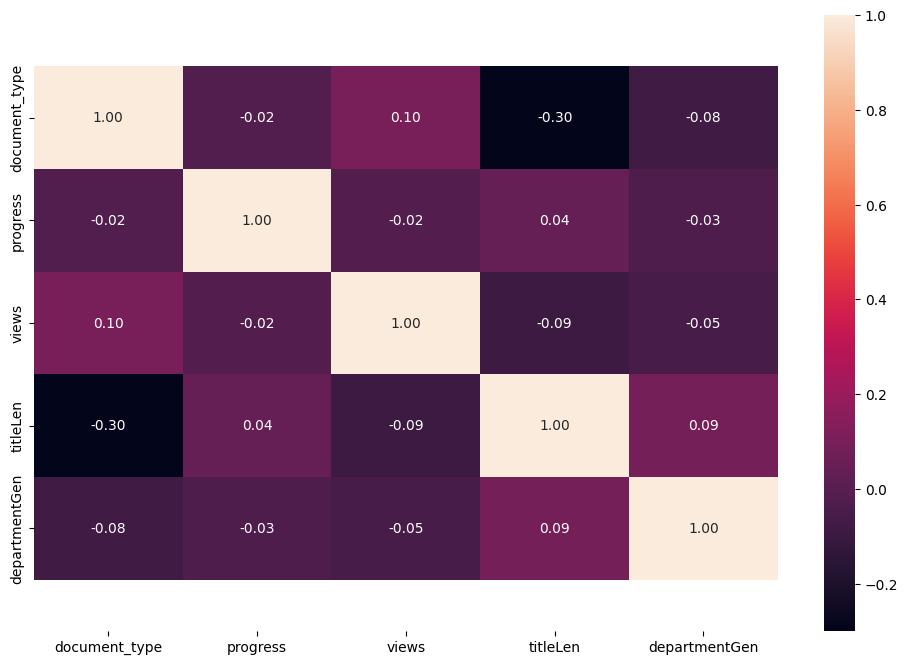

In [8]:
handler.make_correlation()

In [9]:
exdog, endog = handler.make_ex_endog()

train_exdog, test_exdog, train_ans, test_ans = train_test_split(exdog, endog, test_size=0.25, random_state=0)

print(exdog.head(10))

   progress  views  titleLen  departmentGen_civil  departmentGen_economy  \
0       1.0    315        96                  1.0                    0.0   
1       1.0    358        96                  1.0                    0.0   
2       1.0    556       126                  1.0                    0.0   
3       1.0    350       278                  1.0                    0.0   
4       1.0    253        97                  1.0                    0.0   
5       1.0    354        69                  0.0                    1.0   
6       1.0    162       234                  1.0                    0.0   
7       1.0    223       190                  1.0                    0.0   
8       1.0    355        96                  0.0                    1.0   
9       1.0    160       155                  1.0                    0.0   

   departmentGen_international  departmentGen_juridic  departmentGen_nature  \
0                          0.0                    0.0                   0.0   
1    

In [10]:
exdog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   progress                     712 non-null    float64
 1   views                        712 non-null    int64  
 2   titleLen                     712 non-null    int64  
 3   departmentGen_civil          712 non-null    float64
 4   departmentGen_economy        712 non-null    float64
 5   departmentGen_international  712 non-null    float64
 6   departmentGen_juridic        712 non-null    float64
 7   departmentGen_nature         712 non-null    float64
 8   departmentGen_siloviki       712 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 50.2 KB


In [11]:
print(np.unique(endog).__len__())
print(f'assertion: {np.unique(endog).__len__() - handler.working_copy[handler.target_col].unique().__len__()}')

5
assertion: 0


In [32]:
def fix_obj_categorical_param(param_name: str, mapping: Dict[str, Any], best_params: Dict[str, Any]) -> Dict[str, Any]:
    if param_name in best_params:
        new_value = mapping.get(best_params[param_name])()
        best_params.__setitem__(param_name, new_value)
    return best_params


def fix_partition_criterion_param(best_params: Dict[str, Any]) -> Dict[str, Any]:
    return fix_obj_categorical_param('criterion', PARTITION_CRITERION_MAPPING, best_params)


def fix_limiter_param(best_params: Dict[str, Any]) -> Dict[str, Any]:
    return fix_obj_categorical_param('feature_limiter', FEATURES_LIMITER_MAPPING, best_params)


def override_best_params(type_token: Type[T], fix_param_function: Callable[[Dict[str, Any]], Dict[str, Any]]):
    if type_token not in optimizer.modes:
        raise ValueError('Illegal interactor type. Expected existing instance')
    cur_tuple = optimizer.modes[type_token]
    print(cur_tuple)
    optimizer.add_mode(type_token, cur_tuple[0], fix_param_function(cur_tuple[1]))


def iterate_over_parameter(param_name: str, type_token: Type[T], _params: Dict[str, Any], lb: int = 1, ub: int = 101,
                           step: int = 1) -> np.ndarray:
    params = _params.copy()
    optimizer.switch_mode(type_token)
    results = []
    for i in range(lb, ub, step):
        if i % (ub // 10) == 0:
            print(f'processed {i} / {ub} with step {step} iters')
        params[param_name] = i
        classifier = optimizer.current_interactor.build(params)
        classifier.fit(optimizer.train_exdog, optimizer.train_ans)
        pred = classifier.predict(optimizer.test_exdog)
        f1 = optimizer.metric(optimizer.test_ans, pred)
        for _ in range(step):
            results.append(f1)

    return results


def iterate_over_depth(type_token: Type[T], _params: Dict[str, Any], lb: int = 1, ub: int = 101,
                       step: int = 1) -> np.ndarray:
    return iterate_over_parameter('max_depth', type_token, _params, lb, ub, step)


def iterate_over_number_of_trees(type_token: Type[T], _params: Dict[str, Any], lb: int = 1, ub: int = 101,
                                 step: int = 1) -> np.ndarray:
    return iterate_over_parameter('n_estimators', type_token, _params, lb, ub, step)

***Initializing an instance of TreeClassifierOptimizer that used to operate and save parameters and other info from models***
As a metric was chosen f1_score since it takes into account both precision and recall

In [13]:
optimizer = TreeClassifierOptimizer(exdog, endog, test_part=0.25,
                                    metric=lambda ans, pred: f1_score(ans, pred, average='weighted'))

### Decision Tree

#### Library version
find the best parameters for lib DecisionTree with unlimited depth(height) (*`max_depth=np.iinfo(np.int32).max`*)

*add mod to optimizer and test that basically works*

In [14]:
optimizer.add_mode(DecisionTreeLibInteractor, DecisionTreeLibInteractor())
optimizer.switch_mode(DecisionTreeLibInteractor)
dec_tree_lib = optimizer.current_interactor.build(
    {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini'})
dec_tree_lib.fit(optimizer.train_exdog, optimizer.train_ans)
preds = dec_tree_lib.predict(optimizer.test_exdog)
print(f'f1_score: {optimizer.metric(optimizer.test_ans, preds)}')

 [INFO] TreeClassifierOptimizer 2024-06-20 02:09:11.797476: DecisionTreeLibInteractor(<class 'model.interactor.library.decision_tree_interactor_lib.DecisionTreeLibInteractor'>) successfully added(updated)
f1_score: 0.7072495656512826


In [15]:
DEC_TREE_LIB_BEST_PARAMS = optimizer.run_study(n_trials=100)
print(DEC_TREE_LIB_BEST_PARAMS)
DEC_TREE_LIB_BEST_PARAMS = optimizer.modes[DecisionTreeLibInteractor][1]

[I 2024-06-20 02:09:11,811] A new study created in memory with name: no-name-3a347c98-f6bf-4c08-902f-818a600346a7
[I 2024-06-20 02:09:11,817] Trial 0 finished with value: 0.7644522569376758 and parameters: {'max_depth': 2147483647, 'min_samples_split': 2, 'min_samples_leaf': 19, 'criterion': 'gini'}. Best is trial 0 with value: 0.7644522569376758.
[I 2024-06-20 02:09:11,823] Trial 1 finished with value: 0.7319547013464099 and parameters: {'max_depth': 2147483647, 'min_samples_split': 23, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7644522569376758.
[I 2024-06-20 02:09:11,831] Trial 2 finished with value: 0.8217839671821777 and parameters: {'max_depth': 2147483647, 'min_samples_split': 40, 'min_samples_leaf': 44, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.8217839671821777.
[I 2024-06-20 02:09:11,839] Trial 3 finished with value: 0.8153571573439338 and parameters: {'max_depth': 2147483647, 'min_samples_split': 24, 'min_samples_leaf': 49, 'cr

 [INFO] TreeClassifierOptimizer 2024-06-20 02:09:13.286959: <class 'model.interactor.library.decision_tree_interactor_lib.DecisionTreeLibInteractor'> best trial finished with value 0.8217839671821777; best params {'max_depth': 2147483647, 'min_samples_split': 40, 'min_samples_leaf': 44, 'criterion': 'log_loss'}
FrozenTrial(number=2, state=1, values=[0.8217839671821777], datetime_start=datetime.datetime(2024, 6, 20, 2, 9, 11, 824711), datetime_complete=datetime.datetime(2024, 6, 20, 2, 9, 11, 831708), params={'max_depth': 2147483647, 'min_samples_split': 40, 'min_samples_leaf': 44, 'criterion': 'log_loss'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=2147483647, log=False, low=2147483647, step=1), 'min_samples_split': IntDistribution(high=50, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=50, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy', 'log_loss'))}, trial_id

#### Implemented DecisionTree
for impl version in the task wasn't sad to not limit depth, so here also will be found the best `max_depth` parameter

In [16]:
optimizer.add_mode(DecisionTreeImplInteractor, DecisionTreeImplInteractor())
optimizer.switch_mode(DecisionTreeImplInteractor)
decision_tree = optimizer.current_interactor.build(
    {'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': GiniCriterion()})
decision_tree.fit(optimizer.train_exdog, optimizer.train_ans)
preds = decision_tree.predict(optimizer.test_exdog)
print(f'f1_score: {optimizer.metric(optimizer.test_ans, preds)}')

 [INFO] TreeClassifierOptimizer 2024-06-20 02:09:13.291765: DecisionTreeImplInteractor(<class 'model.interactor.impl.decision_tree_interactor.DecisionTreeImplInteractor'>) successfully added(updated)
f1_score: 0.8049480075371623


In [17]:
DEC_TREE_IMPL_BEST_PARAMS = optimizer.run_study(n_trials=100)
print(DEC_TREE_IMPL_BEST_PARAMS)
override_best_params(DecisionTreeImplInteractor, fix_partition_criterion_param)
DEC_TREE_IMPL_BEST_PARAMS = optimizer.modes[DecisionTreeImplInteractor][1]

[I 2024-06-20 02:09:18,740] A new study created in memory with name: no-name-b87b942b-70ca-4a1f-bddd-6faf30c019ec
[I 2024-06-20 02:09:23,820] Trial 0 finished with value: 0.8082070041263647 and parameters: {'max_depth': 99, 'min_samples_split': 19, 'min_samples_leaf': 15, 'criterion': 'gini'}. Best is trial 0 with value: 0.8082070041263647.
[I 2024-06-20 02:09:29,674] Trial 1 finished with value: 0.7606119486663543 and parameters: {'max_depth': 132, 'min_samples_split': 22, 'min_samples_leaf': 7, 'criterion': 'gini'}. Best is trial 0 with value: 0.8082070041263647.
[I 2024-06-20 02:09:34,722] Trial 2 finished with value: 0.8082070041263647 and parameters: {'max_depth': 154, 'min_samples_split': 32, 'min_samples_leaf': 12, 'criterion': 'gini'}. Best is trial 0 with value: 0.8082070041263647.
[I 2024-06-20 02:09:39,981] Trial 3 finished with value: 0.8153571573439338 and parameters: {'max_depth': 148, 'min_samples_split': 47, 'min_samples_leaf': 28, 'criterion': 'gini'}. Best is trial 3 

 [INFO] TreeClassifierOptimizer 2024-06-20 02:16:54.824086: <class 'model.interactor.impl.decision_tree_interactor.DecisionTreeImplInteractor'> best trial finished with value 0.8217839671821777; best params {'max_depth': 89, 'min_samples_split': 16, 'min_samples_leaf': 49, 'criterion': 'log_loss'}
FrozenTrial(number=5, state=1, values=[0.8217839671821777], datetime_start=datetime.datetime(2024, 6, 20, 2, 9, 44, 607103), datetime_complete=datetime.datetime(2024, 6, 20, 2, 9, 48, 780592), params={'max_depth': 89, 'min_samples_split': 16, 'min_samples_leaf': 49, 'criterion': 'log_loss'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=200, log=False, low=1, step=1), 'min_samples_split': IntDistribution(high=50, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=50, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('entropy', 'gini', 'log_loss'))}, trial_id=5, value=None)
(<model.interactor.imp

### Dependency on tree depth

In [18]:
lib_depth_dep = iterate_over_depth(DecisionTreeLibInteractor, DEC_TREE_LIB_BEST_PARAMS)
impl_depth_dep = iterate_over_depth(DecisionTreeImplInteractor, DEC_TREE_IMPL_BEST_PARAMS)

processed 10 / 101 with step 1 iters
processed 20 / 101 with step 1 iters
processed 30 / 101 with step 1 iters
processed 40 / 101 with step 1 iters
processed 50 / 101 with step 1 iters
processed 60 / 101 with step 1 iters
processed 70 / 101 with step 1 iters
processed 80 / 101 with step 1 iters
processed 90 / 101 with step 1 iters
processed 100 / 101 with step 1 iters
processed 10 / 101 with step 1 iters
processed 20 / 101 with step 1 iters
processed 30 / 101 with step 1 iters
processed 40 / 101 with step 1 iters
processed 50 / 101 with step 1 iters
processed 60 / 101 with step 1 iters
processed 70 / 101 with step 1 iters
processed 80 / 101 with step 1 iters
processed 90 / 101 with step 1 iters
processed 100 / 101 with step 1 iters


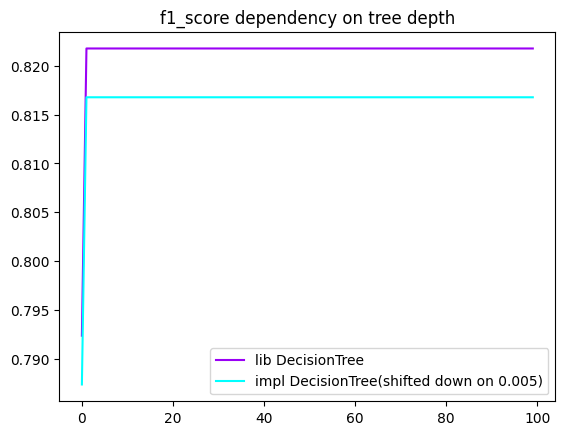

In [41]:
plt.plot(lib_depth_dep, label='lib DecisionTree', c=ultraviolet)
plt.plot(np.array(impl_depth_dep) - 0.005, label='impl DecisionTree(shifted down on 0.005)', c=pure_aqua)
plt.title('f1_score dependency on tree depth')
plt.legend()
plt.show()

### Random Forest

#### Random Forest *(impl)*

In [20]:
optimizer.add_mode(RandomForestImplInteractor, RandomForestImplInteractor())
optimizer.switch_mode(RandomForestImplInteractor)
rand_forest = optimizer.current_interactor.build(
    {'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 5, 'criterion': GiniCriterion(),
     'bootstrap': 1, 'n_estimators': 10, 'feature_limiter': Log2Limiter()})
rand_forest.fit(optimizer.train_exdog, optimizer.train_ans)
preds = rand_forest.predict(optimizer.test_exdog)
print(f'f1_score: {optimizer.metric(optimizer.test_ans, preds)}')

 [INFO] TreeClassifierOptimizer 2024-06-20 02:23:41.002726: RandomForestImplInteractor(<class 'model.interactor.impl.random_forest_interactor.RandomForestImplInteractor'>) successfully added(updated)
 [INFO] RandomForestClassifierImpl 2024-06-20 02:23:41.006337: Processed 0 / 10 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:23:57.673642: Processed 10 / 10 estimators
f1_score: 0.793487811515882


In [21]:
RAND_FOREST_IMPL_BEST_PARAMS = optimizer.run_study(n_trials=100)
override_best_params(RandomForestImplInteractor, lambda pars: fix_limiter_param(fix_partition_criterion_param(pars)))
RAND_FOREST_IMPL_BEST_PARAMS = optimizer.modes[RandomForestImplInteractor][1]

[I 2024-06-20 02:23:57,691] A new study created in memory with name: no-name-56b46101-105a-4c55-8261-5b8cdbe2c0f5


 [INFO] RandomForestClassifierImpl 2024-06-20 02:23:57.696723: Processed 0 / 18 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:02.102115: Processed 10 / 18 estimators


[I 2024-06-20 02:24:05,576] Trial 0 finished with value: 0.8012058780062071 and parameters: {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 29, 'bootstrap': 0, 'n_estimators': 18, 'criterion': 'entropy', 'feature_limiter': 'sqrt'}. Best is trial 0 with value: 0.8012058780062071.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:05.576012: Processed 18 / 18 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:05.576012: Processed 0 / 14 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:23.912096: Processed 10 / 14 estimators


[I 2024-06-20 02:24:29,324] Trial 1 finished with value: 0.7293193361366572 and parameters: {'max_depth': 50, 'min_samples_split': 23, 'min_samples_leaf': 36, 'bootstrap': 0, 'n_estimators': 14, 'criterion': 'entropy', 'feature_limiter': 'none'}. Best is trial 0 with value: 0.8012058780062071.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:29.324397: Processed 14 / 14 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:29.324397: Processed 0 / 21 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:43.449777: Processed 10 / 21 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:56.325120: Processed 20 / 21 estimators


[I 2024-06-20 02:24:57,513] Trial 2 finished with value: 0.8288880721898517 and parameters: {'max_depth': 25, 'min_samples_split': 40, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 21, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:57.513129: Processed 21 / 21 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:24:57.513129: Processed 0 / 15 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:25:53.731048: Processed 10 / 15 estimators


[I 2024-06-20 02:26:21,733] Trial 3 finished with value: 0.7471001561224604 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 5, 'bootstrap': 0, 'n_estimators': 15, 'criterion': 'log_loss', 'feature_limiter': 'none'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:26:21.733692: Processed 15 / 15 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:26:21.733692: Processed 0 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:26:35.220404: Processed 10 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:26:48.464917: Processed 20 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:02.449864: Processed 30 / 32 estimators


[I 2024-06-20 02:27:05,357] Trial 4 finished with value: 0.8060961086491722 and parameters: {'max_depth': 18, 'min_samples_split': 34, 'min_samples_leaf': 48, 'bootstrap': 0, 'n_estimators': 32, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:05.342321: Processed 32 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:05.358271: Processed 0 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:18.306529: Processed 10 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:31.916063: Processed 20 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:45.411658: Processed 30 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:27:58.741137: Processed 40 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:28:11.557906: Processed 50 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:28:24.096753: Processed 60 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:28:38.096930: Processed 70 / 78 estimators


[I 2024-06-20 02:28:49,784] Trial 5 finished with value: 0.8288880721898517 and parameters: {'max_depth': 36, 'min_samples_split': 20, 'min_samples_leaf': 40, 'bootstrap': 0, 'n_estimators': 78, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:28:49.776204: Processed 78 / 78 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:28:49.786190: Processed 0 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:29:05.744836: Processed 10 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:29:20.368158: Processed 20 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:29:36.507930: Processed 30 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:29:51.155119: Processed 40 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:05.648899: Processed 50 / 59 estimators


[I 2024-06-20 02:30:19,974] Trial 6 finished with value: 0.8131485233621907 and parameters: {'max_depth': 40, 'min_samples_split': 32, 'min_samples_leaf': 16, 'bootstrap': 1, 'n_estimators': 59, 'criterion': 'log_loss', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:19.974172: Processed 59 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:19.974172: Processed 0 / 60 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:25.469484: Processed 10 / 60 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:30.523230: Processed 20 / 60 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:35.976910: Processed 30 / 60 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:41.526949: Processed 40 / 60 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:46.677770: Processed 50 / 60 estimators


[I 2024-06-20 02:30:51,793] Trial 7 finished with value: 0.7854120197619395 and parameters: {'max_depth': 5, 'min_samples_split': 35, 'min_samples_leaf': 21, 'bootstrap': 0, 'n_estimators': 60, 'criterion': 'entropy', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:51.793461: Processed 60 / 60 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:51.805739: Processed 0 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:30:58.583231: Processed 10 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:04.117429: Processed 20 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:11.285169: Processed 30 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:17.989820: Processed 40 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:25.607953: Processed 50 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:32.484945: Processed 60 / 62 estimators


[I 2024-06-20 02:31:34,252] Trial 8 finished with value: 0.7854120197619395 and parameters: {'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 11, 'bootstrap': 0, 'n_estimators': 62, 'criterion': 'entropy', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:34.229854: Processed 62 / 62 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:34.253999: Processed 0 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:39.359676: Processed 10 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:44.013867: Processed 20 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:48.719409: Processed 30 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:53.163157: Processed 40 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:31:58.238202: Processed 50 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:02.495744: Processed 60 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:07.448568: Processed 70 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:12.477226: Processed 80 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:17.817650: Processed 90 / 98 

[I 2024-06-20 02:32:21,227] Trial 9 finished with value: 0.8012058780062071 and parameters: {'max_depth': 9, 'min_samples_split': 42, 'min_samples_leaf': 36, 'bootstrap': 0, 'n_estimators': 98, 'criterion': 'entropy', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:21.227976: Processed 98 / 98 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:21.243794: Processed 0 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:33.935153: Processed 10 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:45.705636: Processed 20 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:32:57.597822: Processed 30 / 37 estimators


[I 2024-06-20 02:33:05,758] Trial 10 finished with value: 0.7465012398142273 and parameters: {'max_depth': 26, 'min_samples_split': 46, 'min_samples_leaf': 50, 'bootstrap': 1, 'n_estimators': 37, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:33:05.758167: Processed 37 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:33:05.789320: Processed 0 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:33:18.775994: Processed 10 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:33:31.604223: Processed 20 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:33:44.185865: Processed 30 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:33:58.386231: Processed 40 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:34:11.369525: Processed 50 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:34:24.081167: Processed 60 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:34:36.653031: Processed 70 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:34:49.380645: Processed 80 / 86 estimators


[I 2024-06-20 02:34:57,669] Trial 11 finished with value: 0.8203078799526908 and parameters: {'max_depth': 32, 'min_samples_split': 16, 'min_samples_leaf': 40, 'bootstrap': 1, 'n_estimators': 86, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:34:57.669985: Processed 86 / 86 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:34:57.685613: Processed 0 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:35:11.485517: Processed 10 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:35:26.513648: Processed 20 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:35:41.893864: Processed 30 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:35:56.250190: Processed 40 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:11.105741: Processed 50 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:25.348779: Processed 60 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:40.473241: Processed 70 / 74 estimators


[I 2024-06-20 02:36:46,915] Trial 12 finished with value: 0.8059648799656167 and parameters: {'max_depth': 36, 'min_samples_split': 50, 'min_samples_leaf': 28, 'bootstrap': 0, 'n_estimators': 74, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:46.900177: Processed 74 / 74 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:46.931449: Processed 0 / 2 estimators


[I 2024-06-20 02:36:50,012] Trial 13 finished with value: 0.6315331641899239 and parameters: {'max_depth': 23, 'min_samples_split': 27, 'min_samples_leaf': 42, 'bootstrap': 0, 'n_estimators': 2, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:50.012149: Processed 2 / 2 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:36:50.029680: Processed 0 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:37:35.002101: Processed 10 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:38:19.571071: Processed 20 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:39:05.954940: Processed 30 / 40 estimators


[I 2024-06-20 02:39:52,294] Trial 14 finished with value: 0.8168053446705131 and parameters: {'max_depth': 45, 'min_samples_split': 14, 'min_samples_leaf': 32, 'bootstrap': 1, 'n_estimators': 40, 'criterion': 'gini', 'feature_limiter': 'none'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:39:52.294634: Processed 40 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:39:52.309197: Processed 0 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:40:07.561185: Processed 10 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:40:22.660011: Processed 20 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:40:36.963108: Processed 30 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:40:51.352684: Processed 40 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:41:05.343987: Processed 50 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:41:20.749146: Processed 60 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:41:35.220088: Processed 70 / 77 estimators


[I 2024-06-20 02:41:46,292] Trial 15 finished with value: 0.8059648799656167 and parameters: {'max_depth': 29, 'min_samples_split': 39, 'min_samples_leaf': 22, 'bootstrap': 0, 'n_estimators': 77, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:41:46.277179: Processed 77 / 77 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:41:46.308570: Processed 0 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:41:58.697965: Processed 10 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:42:11.759282: Processed 20 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:42:24.912830: Processed 30 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:42:36.941624: Processed 40 / 48 estimators


[I 2024-06-20 02:42:48,332] Trial 16 finished with value: 0.6315331641899239 and parameters: {'max_depth': 19, 'min_samples_split': 29, 'min_samples_leaf': 42, 'bootstrap': 0, 'n_estimators': 48, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:42:48.332366: Processed 48 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:42:48.348128: Processed 0 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:43:01.336538: Processed 10 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:43:13.549966: Processed 20 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:43:25.600628: Processed 30 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:43:37.488960: Processed 40 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:43:50.499477: Processed 50 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:44:02.692718: Processed 60 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:44:14.446201: Processed 70 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:44:27.224126: Processed 80 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:44:41.845266: Processed 90 / 96 

[I 2024-06-20 02:44:48,886] Trial 17 finished with value: 0.78036730524692 and parameters: {'max_depth': 36, 'min_samples_split': 10, 'min_samples_leaf': 45, 'bootstrap': 1, 'n_estimators': 96, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:44:48.871225: Processed 96 / 96 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:44:48.903066: Processed 0 / 24 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:45:02.594356: Processed 10 / 24 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:45:14.611075: Processed 20 / 24 estimators


[I 2024-06-20 02:45:20,842] Trial 18 finished with value: 0.8288880721898517 and parameters: {'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 24, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:45:20.842035: Processed 24 / 24 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:45:20.857627: Processed 0 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:46:10.655112: Processed 10 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:47:00.145914: Processed 20 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:47:49.686001: Processed 30 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:48:39.149480: Processed 40 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:49:28.731804: Processed 50 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:50:18.277738: Processed 60 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:07.825412: Processed 70 / 72 estimators


[I 2024-06-20 02:51:17,720] Trial 19 finished with value: 0.8153571573439338 and parameters: {'max_depth': 31, 'min_samples_split': 21, 'min_samples_leaf': 24, 'bootstrap': 0, 'n_estimators': 72, 'criterion': 'gini', 'feature_limiter': 'none'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:17.720286: Processed 72 / 72 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:17.752155: Processed 0 / 1 estimators


[I 2024-06-20 02:51:19,229] Trial 20 finished with value: 0.6315331641899239 and parameters: {'max_depth': 22, 'min_samples_split': 39, 'min_samples_leaf': 38, 'bootstrap': 1, 'n_estimators': 1, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:19.229404: Processed 1 / 1 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:19.245191: Processed 0 / 26 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:33.660551: Processed 10 / 26 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:45.917800: Processed 20 / 26 estimators


[I 2024-06-20 02:51:54,674] Trial 21 finished with value: 0.6315331641899239 and parameters: {'max_depth': 43, 'min_samples_split': 2, 'min_samples_leaf': 33, 'bootstrap': 0, 'n_estimators': 26, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:54.674271: Processed 26 / 26 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:51:54.690041: Processed 0 / 25 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:52:07.257617: Processed 10 / 25 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:52:20.841657: Processed 20 / 25 estimators


[I 2024-06-20 02:52:27,587] Trial 22 finished with value: 0.8059648799656167 and parameters: {'max_depth': 36, 'min_samples_split': 1, 'min_samples_leaf': 32, 'bootstrap': 0, 'n_estimators': 25, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:52:27.587560: Processed 25 / 25 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:52:27.602661: Processed 0 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:52:42.321339: Processed 10 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:52:56.269356: Processed 20 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:53:09.540685: Processed 30 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:53:22.872958: Processed 40 / 48 estimators


[I 2024-06-20 02:53:33,526] Trial 23 finished with value: 0.8288880721898517 and parameters: {'max_depth': 47, 'min_samples_split': 15, 'min_samples_leaf': 44, 'bootstrap': 0, 'n_estimators': 48, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:53:33.512316: Processed 48 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:53:33.542869: Processed 0 / 9 estimators


[I 2024-06-20 02:53:47,179] Trial 24 finished with value: 0.7980693147649945 and parameters: {'max_depth': 40, 'min_samples_split': 11, 'min_samples_leaf': 28, 'bootstrap': 0, 'n_estimators': 9, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:53:47.179579: Processed 9 / 9 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:53:47.196059: Processed 0 / 25 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:00.052840: Processed 10 / 25 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:11.961893: Processed 20 / 25 estimators


[I 2024-06-20 02:54:18,842] Trial 25 finished with value: 0.8288880721898517 and parameters: {'max_depth': 28, 'min_samples_split': 18, 'min_samples_leaf': 36, 'bootstrap': 0, 'n_estimators': 25, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:18.842569: Processed 25 / 25 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:18.859054: Processed 0 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:32.210864: Processed 10 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:46.409751: Processed 20 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:54:59.512392: Processed 30 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:55:13.832239: Processed 40 / 44 estimators


[I 2024-06-20 02:55:19,365] Trial 26 finished with value: 0.8288880721898517 and parameters: {'max_depth': 33, 'min_samples_split': 25, 'min_samples_leaf': 46, 'bootstrap': 0, 'n_estimators': 44, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:55:19.365626: Processed 44 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:55:19.381197: Processed 0 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:55:33.936582: Processed 10 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:55:48.463173: Processed 20 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:56:05.072141: Processed 30 / 33 estimators


[I 2024-06-20 02:56:09,853] Trial 27 finished with value: 0.808083302465325 and parameters: {'max_depth': 40, 'min_samples_split': 30, 'min_samples_leaf': 18, 'bootstrap': 0, 'n_estimators': 33, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 02:56:09.853936: Processed 33 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:56:09.870296: Processed 0 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:56:58.246080: Processed 10 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:57:46.279258: Processed 20 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:58:34.347652: Processed 30 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 02:59:22.367741: Processed 40 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:00:10.446348: Processed 50 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:00:58.970799: Processed 60 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:01:47.060575: Processed 70 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:02:35.222255: Processed 80 / 87 estimators


[I 2024-06-20 03:03:08,916] Trial 28 finished with value: 0.8217839671821777 and parameters: {'max_depth': 17, 'min_samples_split': 43, 'min_samples_leaf': 39, 'bootstrap': 0, 'n_estimators': 87, 'criterion': 'log_loss', 'feature_limiter': 'none'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:08.899647: Processed 87 / 87 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:08.931507: Processed 0 / 18 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:23.459154: Processed 10 / 18 estimators


[I 2024-06-20 03:03:35,552] Trial 29 finished with value: 0.8059648799656167 and parameters: {'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 31, 'bootstrap': 0, 'n_estimators': 18, 'criterion': 'gini', 'feature_limiter': 'log2'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:35.552455: Processed 18 / 18 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:35.567488: Processed 0 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:41.040514: Processed 10 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:45.880139: Processed 20 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:50.898129: Processed 30 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:03:55.441941: Processed 40 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:00.382747: Processed 50 / 53 estimators


[I 2024-06-20 03:04:01,773] Trial 30 finished with value: 0.8012058780062071 and parameters: {'max_depth': 42, 'min_samples_split': 8, 'min_samples_leaf': 26, 'bootstrap': 0, 'n_estimators': 53, 'criterion': 'entropy', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:01.757614: Processed 53 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:01.788779: Processed 0 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:15.109356: Processed 10 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:28.412079: Processed 20 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:41.908402: Processed 30 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:04:55.481945: Processed 40 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:05:08.999340: Processed 50 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:05:23.065653: Processed 60 / 66 estimators


[I 2024-06-20 03:05:30,348] Trial 31 finished with value: 0.6315331641899239 and parameters: {'max_depth': 50, 'min_samples_split': 13, 'min_samples_leaf': 43, 'bootstrap': 0, 'n_estimators': 66, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:05:30.348249: Processed 66 / 66 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:05:30.379490: Processed 0 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:05:44.470662: Processed 10 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:05:59.521934: Processed 20 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:06:13.677835: Processed 30 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:06:27.513405: Processed 40 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:06:40.327988: Processed 50 / 52 estimators


[I 2024-06-20 03:06:42,987] Trial 32 finished with value: 0.6315331641899239 and parameters: {'max_depth': 47, 'min_samples_split': 23, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 52, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:06:42.972318: Processed 52 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:06:43.003308: Processed 0 / 20 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:06:57.257615: Processed 10 / 20 estimators


[I 2024-06-20 03:07:10,270] Trial 33 finished with value: 0.6315331641899239 and parameters: {'max_depth': 47, 'min_samples_split': 16, 'min_samples_leaf': 39, 'bootstrap': 0, 'n_estimators': 20, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:07:10.270356: Processed 20 / 20 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:07:10.285975: Processed 0 / 8 estimators


[I 2024-06-20 03:07:19,832] Trial 34 finished with value: 0.6315331641899239 and parameters: {'max_depth': 47, 'min_samples_split': 9, 'min_samples_leaf': 46, 'bootstrap': 0, 'n_estimators': 8, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:07:19.832903: Processed 8 / 8 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:07:19.855625: Processed 0 / 29 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:08:08.030014: Processed 10 / 29 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:08:56.225069: Processed 20 / 29 estimators


[I 2024-06-20 03:09:39,609] Trial 35 finished with value: 0.8217839671821777 and parameters: {'max_depth': 38, 'min_samples_split': 6, 'min_samples_leaf': 43, 'bootstrap': 0, 'n_estimators': 29, 'criterion': 'log_loss', 'feature_limiter': 'none'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:39.609836: Processed 29 / 29 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:39.625443: Processed 0 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:44.550632: Processed 10 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:49.390487: Processed 20 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:53.717679: Processed 30 / 36 estimators


[I 2024-06-20 03:09:56,792] Trial 36 finished with value: 0.6315331641899239 and parameters: {'max_depth': 44, 'min_samples_split': 24, 'min_samples_leaf': 50, 'bootstrap': 0, 'n_estimators': 36, 'criterion': 'entropy', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:56.792347: Processed 36 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:09:56.807986: Processed 0 / 14 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:10:14.212918: Processed 10 / 14 estimators


[I 2024-06-20 03:10:21,161] Trial 37 finished with value: 0.6315331641899239 and parameters: {'max_depth': 35, 'min_samples_split': 19, 'min_samples_leaf': 5, 'bootstrap': 0, 'n_estimators': 14, 'criterion': 'gini', 'feature_limiter': 'sqrt'}. Best is trial 2 with value: 0.8288880721898517.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:10:21.161781: Processed 14 / 14 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:10:21.193888: Processed 0 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:10:35.648060: Processed 10 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:10:50.189080: Processed 20 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:11:04.165049: Processed 30 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:11:17.263563: Processed 40 / 46 estimators


[I 2024-06-20 03:11:25,979] Trial 38 finished with value: 0.8355345016970362 and parameters: {'max_depth': 50, 'min_samples_split': 35, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 46, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:11:25.963521: Processed 46 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:11:25.994785: Processed 0 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:11:40.067926: Processed 10 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:11:53.540820: Processed 20 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:12:07.745429: Processed 30 / 40 estimators


[I 2024-06-20 03:12:21,727] Trial 39 finished with value: 0.8355345016970362 and parameters: {'max_depth': 30, 'min_samples_split': 34, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 40, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:12:21.721221: Processed 40 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:12:21.735121: Processed 0 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:12:36.069126: Processed 10 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:12:49.653810: Processed 20 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:13:02.195713: Processed 30 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:13:16.451547: Processed 40 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:13:28.993610: Processed 50 / 59 estimators


[I 2024-06-20 03:13:41,436] Trial 40 finished with value: 0.7465012398142273 and parameters: {'max_depth': 27, 'min_samples_split': 36, 'min_samples_leaf': 37, 'bootstrap': 1, 'n_estimators': 59, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:13:41.420653: Processed 59 / 59 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:13:41.451931: Processed 0 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:13:55.703260: Processed 10 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:14:10.138578: Processed 20 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:14:23.940582: Processed 30 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:14:38.524878: Processed 40 / 41 estimators


[I 2024-06-20 03:14:39,910] Trial 41 finished with value: 0.8355345016970362 and parameters: {'max_depth': 33, 'min_samples_split': 33, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 41, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:14:39.910401: Processed 41 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:14:39.926036: Processed 0 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:14:53.397022: Processed 10 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:15:07.854833: Processed 20 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:15:20.810520: Processed 30 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:15:34.738695: Processed 40 / 43 estimators


[I 2024-06-20 03:15:39,121] Trial 42 finished with value: 0.8131638868296723 and parameters: {'max_depth': 30, 'min_samples_split': 33, 'min_samples_leaf': 31, 'bootstrap': 0, 'n_estimators': 43, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:15:39.121364: Processed 43 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:15:39.136983: Processed 0 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:15:53.309979: Processed 10 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:16:07.742813: Processed 20 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:16:22.220636: Processed 30 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:16:35.875324: Processed 40 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:16:49.926993: Processed 50 / 55 estimators


[I 2024-06-20 03:16:57,068] Trial 43 finished with value: 0.8131638868296723 and parameters: {'max_depth': 20, 'min_samples_split': 38, 'min_samples_leaf': 29, 'bootstrap': 0, 'n_estimators': 55, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:16:57.068007: Processed 55 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:16:57.100393: Processed 0 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:17:11.529821: Processed 10 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:17:25.267933: Processed 20 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:17:38.992725: Processed 30 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:17:53.755005: Processed 40 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:18:07.800019: Processed 50 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:18:22.445514: Processed 60 / 65 estimators


[I 2024-06-20 03:18:28,794] Trial 44 finished with value: 0.8060961086491722 and parameters: {'max_depth': 15, 'min_samples_split': 31, 'min_samples_leaf': 40, 'bootstrap': 0, 'n_estimators': 65, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:18:28.794004: Processed 65 / 65 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:18:28.825290: Processed 0 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:18:42.076813: Processed 10 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:18:56.793166: Processed 20 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:19:10.695602: Processed 30 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:19:24.280714: Processed 40 / 41 estimators


[I 2024-06-20 03:19:25,790] Trial 45 finished with value: 0.8355345016970362 and parameters: {'max_depth': 25, 'min_samples_split': 42, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 41, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:19:25.790557: Processed 41 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:19:25.821396: Processed 0 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:19:40.568794: Processed 10 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:19:55.903554: Processed 20 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:20:10.742527: Processed 30 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:20:26.008083: Processed 40 / 41 estimators


[I 2024-06-20 03:20:27,348] Trial 46 finished with value: 0.8151038586635129 and parameters: {'max_depth': 25, 'min_samples_split': 43, 'min_samples_leaf': 25, 'bootstrap': 0, 'n_estimators': 41, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:20:27.333229: Processed 41 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:20:27.365165: Processed 0 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:20:41.668457: Processed 10 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:20:56.131040: Processed 20 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:10.145534: Processed 30 / 33 estimators


[I 2024-06-20 03:21:14,667] Trial 47 finished with value: 0.8355345016970362 and parameters: {'max_depth': 21, 'min_samples_split': 46, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 33, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:14.662916: Processed 33 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:14.682058: Processed 0 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:24.946706: Processed 10 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:35.438998: Processed 20 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:45.957496: Processed 30 / 33 estimators


[I 2024-06-20 03:21:49,155] Trial 48 finished with value: 0.8060961086491722 and parameters: {'max_depth': 2, 'min_samples_split': 49, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 33, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:49.139062: Processed 33 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:21:49.171712: Processed 0 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:22:03.955673: Processed 10 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:22:18.038223: Processed 20 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:22:33.068193: Processed 30 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:22:46.542214: Processed 40 / 46 estimators


[I 2024-06-20 03:22:54,756] Trial 49 finished with value: 0.6315331641899239 and parameters: {'max_depth': 21, 'min_samples_split': 46, 'min_samples_leaf': 27, 'bootstrap': 0, 'n_estimators': 46, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:22:54.750745: Processed 46 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:22:54.779757: Processed 0 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:23:07.407397: Processed 10 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:23:21.938009: Processed 20 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:23:35.601853: Processed 30 / 39 estimators


[I 2024-06-20 03:23:48,379] Trial 50 finished with value: 0.8131638868296723 and parameters: {'max_depth': 12, 'min_samples_split': 36, 'min_samples_leaf': 29, 'bootstrap': 0, 'n_estimators': 39, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:23:48.363723: Processed 39 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:23:48.395770: Processed 0 / 30 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:24:02.282891: Processed 10 / 30 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:24:15.710480: Processed 20 / 30 estimators


[I 2024-06-20 03:24:29,563] Trial 51 finished with value: 0.6315331641899239 and parameters: {'max_depth': 26, 'min_samples_split': 41, 'min_samples_leaf': 33, 'bootstrap': 0, 'n_estimators': 30, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:24:29.548106: Processed 30 / 30 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:24:29.579466: Processed 0 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:24:43.753212: Processed 10 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:24:57.158392: Processed 20 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:25:10.985185: Processed 30 / 36 estimators


[I 2024-06-20 03:25:19,524] Trial 52 finished with value: 0.8355345016970362 and parameters: {'max_depth': 23, 'min_samples_split': 46, 'min_samples_leaf': 37, 'bootstrap': 0, 'n_estimators': 36, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:25:19.509699: Processed 36 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:25:19.540534: Processed 0 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:25:33.590435: Processed 10 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:25:47.853666: Processed 20 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:26:01.913776: Processed 30 / 37 estimators


[I 2024-06-20 03:26:11,839] Trial 53 finished with value: 0.6315331641899239 and parameters: {'max_depth': 17, 'min_samples_split': 46, 'min_samples_leaf': 37, 'bootstrap': 0, 'n_estimators': 37, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:26:11.839430: Processed 37 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:26:11.870826: Processed 0 / 49 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:26:26.196355: Processed 10 / 49 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:26:41.414697: Processed 20 / 49 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:26:56.039803: Processed 30 / 49 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:27:09.350278: Processed 40 / 49 estimators


[I 2024-06-20 03:27:22,657] Trial 54 finished with value: 0.8131638868296723 and parameters: {'max_depth': 23, 'min_samples_split': 28, 'min_samples_leaf': 30, 'bootstrap': 0, 'n_estimators': 49, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:27:22.657578: Processed 49 / 49 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:27:22.689276: Processed 0 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:27:36.283619: Processed 10 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:27:49.518031: Processed 20 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:28:03.154131: Processed 30 / 35 estimators


[I 2024-06-20 03:28:10,115] Trial 55 finished with value: 0.6315331641899239 and parameters: {'max_depth': 5, 'min_samples_split': 48, 'min_samples_leaf': 41, 'bootstrap': 0, 'n_estimators': 35, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:28:10.115981: Processed 35 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:28:10.131609: Processed 0 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:28:24.295582: Processed 10 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:28:39.354255: Processed 20 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:28:53.285163: Processed 30 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:29:06.659023: Processed 40 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:29:20.646444: Processed 50 / 56 estimators


[I 2024-06-20 03:29:29,231] Trial 56 finished with value: 0.8355345016970362 and parameters: {'max_depth': 34, 'min_samples_split': 44, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 56, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:29:29.231420: Processed 56 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:29:29.268730: Processed 0 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:29:42.812035: Processed 10 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:29:56.094677: Processed 20 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:30:09.979661: Processed 30 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:30:25.059925: Processed 40 / 42 estimators


[I 2024-06-20 03:30:28,071] Trial 57 finished with value: 0.8355345016970362 and parameters: {'max_depth': 29, 'min_samples_split': 38, 'min_samples_leaf': 38, 'bootstrap': 0, 'n_estimators': 42, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:30:28.071836: Processed 42 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:30:28.086976: Processed 0 / 29 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:30:41.968694: Processed 10 / 29 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:30:55.686149: Processed 20 / 29 estimators


[I 2024-06-20 03:31:07,590] Trial 58 finished with value: 0.7465012398142273 and parameters: {'max_depth': 31, 'min_samples_split': 35, 'min_samples_leaf': 36, 'bootstrap': 1, 'n_estimators': 29, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:31:07.590039: Processed 29 / 29 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:31:07.622154: Processed 0 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:31:21.719063: Processed 10 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:31:35.663983: Processed 20 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:31:49.180791: Processed 30 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:32:03.888889: Processed 40 / 47 estimators


[I 2024-06-20 03:32:14,233] Trial 59 finished with value: 0.8355345016970362 and parameters: {'max_depth': 22, 'min_samples_split': 45, 'min_samples_leaf': 33, 'bootstrap': 0, 'n_estimators': 47, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:32:14.217256: Processed 47 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:32:14.248352: Processed 0 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:32:33.473757: Processed 10 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:32:52.617347: Processed 20 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:33:11.072893: Processed 30 / 38 estimators


[I 2024-06-20 03:33:25,742] Trial 60 finished with value: 0.7465012398142273 and parameters: {'max_depth': 19, 'min_samples_split': 33, 'min_samples_leaf': 2, 'bootstrap': 0, 'n_estimators': 38, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:33:25.742891: Processed 38 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:33:25.774759: Processed 0 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:33:40.248914: Processed 10 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:33:54.268729: Processed 20 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:34:08.024017: Processed 30 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:34:22.637876: Processed 40 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:34:36.755531: Processed 50 / 57 estimators


[I 2024-06-20 03:34:46,509] Trial 61 finished with value: 0.8355345016970362 and parameters: {'max_depth': 33, 'min_samples_split': 42, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 57, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:34:46.509362: Processed 57 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:34:46.540272: Processed 0 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:35:01.442659: Processed 10 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:35:15.144772: Processed 20 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:35:29.244285: Processed 30 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:35:43.806470: Processed 40 / 45 estimators


[I 2024-06-20 03:35:51,102] Trial 62 finished with value: 0.8131638868296723 and parameters: {'max_depth': 34, 'min_samples_split': 48, 'min_samples_leaf': 31, 'bootstrap': 0, 'n_estimators': 45, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:35:51.102031: Processed 45 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:35:51.134150: Processed 0 / 51 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:36:05.635400: Processed 10 / 51 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:36:19.257142: Processed 20 / 51 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:36:33.968926: Processed 30 / 51 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:36:47.717155: Processed 40 / 51 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:01.281635: Processed 50 / 51 estimators


[I 2024-06-20 03:37:02,718] Trial 63 finished with value: 0.8355345016970362 and parameters: {'max_depth': 38, 'min_samples_split': 40, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 51, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:02.703996: Processed 51 / 51 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:02.729805: Processed 0 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:15.942515: Processed 10 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:28.696700: Processed 20 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:42.963821: Processed 30 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:37:56.690837: Processed 40 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:38:10.533767: Processed 50 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:38:25.621315: Processed 60 / 63 estimators


[I 2024-06-20 03:38:29,501] Trial 64 finished with value: 0.8355345016970362 and parameters: {'max_depth': 28, 'min_samples_split': 44, 'min_samples_leaf': 38, 'bootstrap': 0, 'n_estimators': 63, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:38:29.485816: Processed 63 / 63 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:38:29.517223: Processed 0 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:38:43.256355: Processed 10 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:38:59.032611: Processed 20 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:39:13.508720: Processed 30 / 40 estimators


[I 2024-06-20 03:39:28,417] Trial 65 finished with value: 0.8131638868296723 and parameters: {'max_depth': 24, 'min_samples_split': 37, 'min_samples_leaf': 23, 'bootstrap': 0, 'n_estimators': 40, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:39:28.417682: Processed 40 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:39:28.448948: Processed 0 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:39:46.163693: Processed 10 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:40:02.241759: Processed 20 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:40:19.948874: Processed 30 / 33 estimators


[I 2024-06-20 03:40:23,999] Trial 66 finished with value: 0.7293193361366572 and parameters: {'max_depth': 38, 'min_samples_split': 50, 'min_samples_leaf': 41, 'bootstrap': 0, 'n_estimators': 33, 'criterion': 'entropy', 'feature_limiter': 'none'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:40:23.999985: Processed 33 / 33 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:40:24.016279: Processed 0 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:40:37.618707: Processed 10 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:40:51.854613: Processed 20 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:41:05.988705: Processed 30 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:41:19.314390: Processed 40 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:41:33.679379: Processed 50 / 56 estimators


[I 2024-06-20 03:41:42,616] Trial 67 finished with value: 0.8355345016970362 and parameters: {'max_depth': 26, 'min_samples_split': 41, 'min_samples_leaf': 32, 'bootstrap': 0, 'n_estimators': 56, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:41:42.616115: Processed 56 / 56 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:41:42.647486: Processed 0 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:41:56.443901: Processed 10 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:42:10.320932: Processed 20 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:42:24.948131: Processed 30 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:42:38.920465: Processed 40 / 44 estimators


[I 2024-06-20 03:42:44,559] Trial 68 finished with value: 0.8355345016970362 and parameters: {'max_depth': 32, 'min_samples_split': 44, 'min_samples_leaf': 37, 'bootstrap': 0, 'n_estimators': 44, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:42:44.543381: Processed 44 / 44 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:42:44.575030: Processed 0 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:42:59.048437: Processed 10 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:43:13.535765: Processed 20 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:43:28.332459: Processed 30 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:43:42.897499: Processed 40 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:43:56.885547: Processed 50 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:44:11.566258: Processed 60 / 69 estimators


[I 2024-06-20 03:44:23,871] Trial 69 finished with value: 0.8355345016970362 and parameters: {'max_depth': 15, 'min_samples_split': 47, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 69, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:44:23.855952: Processed 69 / 69 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:44:23.887126: Processed 0 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:44:36.569657: Processed 10 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:44:50.189238: Processed 20 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:45:04.182218: Processed 30 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:45:18.686828: Processed 40 / 50 estimators


[I 2024-06-20 03:45:32,275] Trial 70 finished with value: 0.8060961086491722 and parameters: {'max_depth': 30, 'min_samples_split': 34, 'min_samples_leaf': 39, 'bootstrap': 0, 'n_estimators': 50, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:45:32.275120: Processed 50 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:45:32.306332: Processed 0 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:45:45.189245: Processed 10 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:45:59.232540: Processed 20 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:46:12.821236: Processed 30 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:46:27.045443: Processed 40 / 41 estimators


[I 2024-06-20 03:46:28,426] Trial 71 finished with value: 0.8355345016970362 and parameters: {'max_depth': 29, 'min_samples_split': 39, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 41, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:46:28.420889: Processed 41 / 41 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:46:28.450607: Processed 0 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:46:41.851885: Processed 10 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:46:56.141802: Processed 20 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:47:09.810619: Processed 30 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:47:23.297062: Processed 40 / 42 estimators


[I 2024-06-20 03:47:26,300] Trial 72 finished with value: 0.8355345016970362 and parameters: {'max_depth': 28, 'min_samples_split': 38, 'min_samples_leaf': 38, 'bootstrap': 0, 'n_estimators': 42, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:47:26.300053: Processed 42 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:47:26.331298: Processed 0 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:47:40.711389: Processed 10 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:47:55.943586: Processed 20 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:48:10.728756: Processed 30 / 36 estimators


[I 2024-06-20 03:48:19,416] Trial 73 finished with value: 0.8131638868296723 and parameters: {'max_depth': 25, 'min_samples_split': 32, 'min_samples_leaf': 20, 'bootstrap': 0, 'n_estimators': 36, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:48:19.401090: Processed 36 / 36 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:48:19.432322: Processed 0 / 31 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:48:33.390967: Processed 10 / 31 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:48:47.648040: Processed 20 / 31 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:01.727873: Processed 30 / 31 estimators


[I 2024-06-20 03:49:03,272] Trial 74 finished with value: 0.8131638868296723 and parameters: {'max_depth': 27, 'min_samples_split': 41, 'min_samples_leaf': 13, 'bootstrap': 0, 'n_estimators': 31, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:03.256624: Processed 31 / 31 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:03.287997: Processed 0 / 27 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:22.599519: Processed 10 / 27 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:41.844010: Processed 20 / 27 estimators


[I 2024-06-20 03:49:54,220] Trial 75 finished with value: 0.6088797936387643 and parameters: {'max_depth': 23, 'min_samples_split': 27, 'min_samples_leaf': 41, 'bootstrap': 0, 'n_estimators': 27, 'criterion': 'entropy', 'feature_limiter': 'none'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:54.220555: Processed 27 / 27 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:49:54.236350: Processed 0 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:50:08.491454: Processed 10 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:50:23.083417: Processed 20 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:50:37.301923: Processed 30 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:50:51.674612: Processed 40 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:05.583351: Processed 50 / 53 estimators


[I 2024-06-20 03:51:09,769] Trial 76 finished with value: 0.6315331641899239 and parameters: {'max_depth': 31, 'min_samples_split': 43, 'min_samples_leaf': 37, 'bootstrap': 0, 'n_estimators': 53, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:09.753592: Processed 53 / 53 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:09.784964: Processed 0 / 23 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:23.497263: Processed 10 / 23 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:36.773683: Processed 20 / 23 estimators


[I 2024-06-20 03:51:41,260] Trial 77 finished with value: 0.8355345016970362 and parameters: {'max_depth': 20, 'min_samples_split': 37, 'min_samples_leaf': 33, 'bootstrap': 0, 'n_estimators': 23, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:41.244115: Processed 23 / 23 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:41.277783: Processed 0 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:51:54.919426: Processed 10 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:52:08.021358: Processed 20 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:52:21.703567: Processed 30 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:52:34.982179: Processed 40 / 47 estimators


[I 2024-06-20 03:52:45,270] Trial 78 finished with value: 0.8060961086491722 and parameters: {'max_depth': 33, 'min_samples_split': 40, 'min_samples_leaf': 39, 'bootstrap': 0, 'n_estimators': 47, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:52:45.255119: Processed 47 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:52:45.286348: Processed 0 / 34 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:52:59.972337: Processed 10 / 34 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:53:13.122287: Processed 20 / 34 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:53:27.425514: Processed 30 / 34 estimators


[I 2024-06-20 03:53:32,904] Trial 79 finished with value: 0.8131638868296723 and parameters: {'max_depth': 35, 'min_samples_split': 45, 'min_samples_leaf': 30, 'bootstrap': 0, 'n_estimators': 34, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:53:32.888664: Processed 34 / 34 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:53:32.919914: Processed 0 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:53:47.593272: Processed 10 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:54:01.614915: Processed 20 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:54:15.444776: Processed 30 / 39 estimators


[I 2024-06-20 03:54:26,186] Trial 80 finished with value: 0.8060961086491722 and parameters: {'max_depth': 21, 'min_samples_split': 35, 'min_samples_leaf': 48, 'bootstrap': 0, 'n_estimators': 39, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:54:26.181271: Processed 39 / 39 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:54:26.210571: Processed 0 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:54:41.070104: Processed 10 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:54:55.159087: Processed 20 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:55:10.466721: Processed 30 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:55:25.239037: Processed 40 / 48 estimators


[I 2024-06-20 03:55:36,696] Trial 81 finished with value: 0.8355345016970362 and parameters: {'max_depth': 22, 'min_samples_split': 45, 'min_samples_leaf': 33, 'bootstrap': 0, 'n_estimators': 48, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:55:36.696629: Processed 48 / 48 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:55:36.727423: Processed 0 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:55:51.333035: Processed 10 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:56:05.334387: Processed 20 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:56:19.494101: Processed 30 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:56:33.609242: Processed 40 / 43 estimators


[I 2024-06-20 03:56:38,347] Trial 82 finished with value: 0.8355345016970362 and parameters: {'max_depth': 24, 'min_samples_split': 42, 'min_samples_leaf': 36, 'bootstrap': 0, 'n_estimators': 43, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:56:38.347291: Processed 43 / 43 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:56:38.382809: Processed 0 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:56:52.501222: Processed 10 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:57:06.657757: Processed 20 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:57:20.192761: Processed 30 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:57:33.849562: Processed 40 / 45 estimators


[I 2024-06-20 03:57:40,650] Trial 83 finished with value: 0.6315331641899239 and parameters: {'max_depth': 18, 'min_samples_split': 48, 'min_samples_leaf': 32, 'bootstrap': 0, 'n_estimators': 45, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:57:40.650769: Processed 45 / 45 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:57:40.682725: Processed 0 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:57:55.284159: Processed 10 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:58:09.539704: Processed 20 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:58:23.872041: Processed 30 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:58:39.212411: Processed 40 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:58:53.097621: Processed 50 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:59:06.983401: Processed 60 / 61 estimators


[I 2024-06-20 03:59:08,392] Trial 84 finished with value: 0.8355345016970362 and parameters: {'max_depth': 27, 'min_samples_split': 46, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 61, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 03:59:08.391227: Processed 61 / 61 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:59:08.421795: Processed 0 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:59:22.535102: Processed 10 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:59:36.933668: Processed 20 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 03:59:51.187940: Processed 30 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:00:06.273710: Processed 40 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:00:21.085216: Processed 50 / 52 estimators


[I 2024-06-20 04:00:24,154] Trial 85 finished with value: 0.8151038586635129 and parameters: {'max_depth': 22, 'min_samples_split': 44, 'min_samples_leaf': 28, 'bootstrap': 0, 'n_estimators': 52, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:00:24.153226: Processed 52 / 52 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:00:24.169180: Processed 0 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:00:41.752558: Processed 10 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:01:00.358759: Processed 20 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:01:21.992867: Processed 30 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:01:41.581814: Processed 40 / 47 estimators


[I 2024-06-20 04:01:55,120] Trial 86 finished with value: 0.6088797936387643 and parameters: {'max_depth': 25, 'min_samples_split': 30, 'min_samples_leaf': 30, 'bootstrap': 0, 'n_estimators': 47, 'criterion': 'entropy', 'feature_limiter': 'none'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:01:55.105055: Processed 47 / 47 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:01:55.136805: Processed 0 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:02:08.671948: Processed 10 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:02:22.831414: Processed 20 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:02:36.486762: Processed 30 / 37 estimators


[I 2024-06-20 04:02:45,912] Trial 87 finished with value: 0.6315331641899239 and parameters: {'max_depth': 30, 'min_samples_split': 39, 'min_samples_leaf': 43, 'bootstrap': 0, 'n_estimators': 37, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:02:45.912869: Processed 37 / 37 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:02:45.928474: Processed 0 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:02:59.394867: Processed 10 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:03:11.921294: Processed 20 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:03:26.187997: Processed 30 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:03:40.533036: Processed 40 / 42 estimators


[I 2024-06-20 04:03:43,301] Trial 88 finished with value: 0.8131638868296723 and parameters: {'max_depth': 16, 'min_samples_split': 47, 'min_samples_leaf': 34, 'bootstrap': 1, 'n_estimators': 42, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:03:43.301741: Processed 42 / 42 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:03:43.316865: Processed 0 / 58 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:03:57.943950: Processed 10 / 58 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:04:12.549133: Processed 20 / 58 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:04:26.418191: Processed 30 / 58 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:04:40.445183: Processed 40 / 58 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:04:53.445111: Processed 50 / 58 estimators


[I 2024-06-20 04:05:04,543] Trial 89 finished with value: 0.8060961086491722 and parameters: {'max_depth': 29, 'min_samples_split': 42, 'min_samples_leaf': 40, 'bootstrap': 0, 'n_estimators': 58, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:05:04.543084: Processed 58 / 58 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:05:04.575185: Processed 0 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:05:18.366263: Processed 10 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:05:32.563647: Processed 20 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:05:46.454966: Processed 30 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:06:01.153141: Processed 40 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:06:15.034578: Processed 50 / 55 estimators


[I 2024-06-20 04:06:22,062] Trial 90 finished with value: 0.8355345016970362 and parameters: {'max_depth': 10, 'min_samples_split': 49, 'min_samples_leaf': 38, 'bootstrap': 0, 'n_estimators': 55, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:06:22.062073: Processed 55 / 55 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:06:22.090477: Processed 0 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:06:36.132272: Processed 10 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:06:49.015344: Processed 20 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:07:03.547345: Processed 30 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:07:17.965721: Processed 40 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:07:31.961514: Processed 50 / 57 estimators


[I 2024-06-20 04:07:41,888] Trial 91 finished with value: 0.6315331641899239 and parameters: {'max_depth': 33, 'min_samples_split': 43, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 57, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:07:41.872457: Processed 57 / 57 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:07:41.903661: Processed 0 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:07:55.693664: Processed 10 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:08:10.624175: Processed 20 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:08:24.594339: Processed 30 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:08:38.283166: Processed 40 / 50 estimators


[I 2024-06-20 04:08:51,846] Trial 92 finished with value: 0.8355345016970362 and parameters: {'max_depth': 32, 'min_samples_split': 37, 'min_samples_leaf': 33, 'bootstrap': 0, 'n_estimators': 50, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:08:51.846236: Processed 50 / 50 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:08:51.877629: Processed 0 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:09:05.818789: Processed 10 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:09:20.292405: Processed 20 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:09:34.680034: Processed 30 / 40 estimators


[I 2024-06-20 04:09:48,571] Trial 93 finished with value: 0.6315331641899239 and parameters: {'max_depth': 36, 'min_samples_split': 45, 'min_samples_leaf': 36, 'bootstrap': 0, 'n_estimators': 40, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:09:48.571468: Processed 40 / 40 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:09:48.602698: Processed 0 / 54 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:10:01.535745: Processed 10 / 54 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:10:15.871686: Processed 20 / 54 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:10:29.524115: Processed 30 / 54 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:10:42.728872: Processed 40 / 54 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:10:57.144847: Processed 50 / 54 estimators


[I 2024-06-20 04:11:02,852] Trial 94 finished with value: 0.8355345016970362 and parameters: {'max_depth': 34, 'min_samples_split': 40, 'min_samples_leaf': 32, 'bootstrap': 0, 'n_estimators': 54, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:11:02.836939: Processed 54 / 54 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:11:02.867842: Processed 0 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:11:16.616597: Processed 10 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:11:29.558478: Processed 20 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:11:43.359566: Processed 30 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:11:57.187763: Processed 40 / 46 estimators


[I 2024-06-20 04:12:05,773] Trial 95 finished with value: 0.8355345016970362 and parameters: {'max_depth': 37, 'min_samples_split': 42, 'min_samples_leaf': 37, 'bootstrap': 0, 'n_estimators': 46, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:05.773806: Processed 46 / 46 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:05.805659: Processed 0 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:20.305927: Processed 10 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:33.775062: Processed 20 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:46.862598: Processed 30 / 35 estimators


[I 2024-06-20 04:12:54,244] Trial 96 finished with value: 0.8355345016970362 and parameters: {'max_depth': 20, 'min_samples_split': 33, 'min_samples_leaf': 36, 'bootstrap': 0, 'n_estimators': 35, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:54.244644: Processed 35 / 35 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:12:54.261059: Processed 0 / 28 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:13:08.078627: Processed 10 / 28 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:13:21.794454: Processed 20 / 28 estimators


[I 2024-06-20 04:13:33,715] Trial 97 finished with value: 0.6315331641899239 and parameters: {'max_depth': 29, 'min_samples_split': 36, 'min_samples_leaf': 31, 'bootstrap': 0, 'n_estimators': 28, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:13:33.715796: Processed 28 / 28 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:13:33.746697: Processed 0 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:13:48.051678: Processed 10 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:14:01.216896: Processed 20 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:14:15.707837: Processed 30 / 32 estimators


[I 2024-06-20 04:14:18,478] Trial 98 finished with value: 0.8355345016970362 and parameters: {'max_depth': 23, 'min_samples_split': 38, 'min_samples_leaf': 34, 'bootstrap': 0, 'n_estimators': 32, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:14:18.462060: Processed 32 / 32 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:14:18.493964: Processed 0 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:14:32.964754: Processed 10 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:14:46.714987: Processed 20 / 38 estimators
 [INFO] RandomForestClassifierImpl 2024-06-20 04:15:01.101227: Processed 30 / 38 estimators


[I 2024-06-20 04:15:12,226] Trial 99 finished with value: 0.8355345016970362 and parameters: {'max_depth': 39, 'min_samples_split': 41, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 38, 'criterion': 'log_loss', 'feature_limiter': 'log2'}. Best is trial 38 with value: 0.8355345016970362.


 [INFO] RandomForestClassifierImpl 2024-06-20 04:15:12.211173: Processed 38 / 38 estimators
 [INFO] TreeClassifierOptimizer 2024-06-20 04:15:12.226345: <class 'model.interactor.impl.random_forest_interactor.RandomForestImplInteractor'> best trial finished with value 0.8355345016970362; best params {'max_depth': 50, 'min_samples_split': 35, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 46, 'criterion': 'log_loss', 'feature_limiter': 'log2'}
(<model.interactor.impl.random_forest_interactor.RandomForestImplInteractor object at 0x0000012EDC993740>, {'max_depth': 50, 'min_samples_split': 35, 'min_samples_leaf': 35, 'bootstrap': 0, 'n_estimators': 46, 'criterion': 'log_loss', 'feature_limiter': 'log2'})
 [INFO] TreeClassifierOptimizer 2024-06-20 04:15:12.226345: RandomForestImplInteractor(<class 'model.interactor.impl.random_forest_interactor.RandomForestImplInteractor'>) successfully added(updated) with params {'max_depth': 50, 'min_samples_split': 35, 'min_samples_leaf': 35, 'boo

#### Random Forest *(lib)*

In [22]:
optimizer.add_mode(RandomForestLibInteractor, RandomForestLibInteractor())
optimizer.switch_mode(RandomForestLibInteractor)
rand_forest_lib = optimizer.current_interactor.build(
    {'max_depth': 25, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini',
     'bootstrap': 1, 'n_estimators': 20})
rand_forest_lib.fit(optimizer.train_exdog, optimizer.train_ans)
preds = rand_forest_lib.predict(optimizer.test_exdog)
print(f'f1_score: {optimizer.metric(optimizer.test_ans, preds)}')

 [INFO] TreeClassifierOptimizer 2024-06-20 04:15:12.232139: RandomForestLibInteractor(<class 'model.interactor.library.random_forest_interactor_lib.RandomForestLibInteractor'>) successfully added(updated)
f1_score: 0.7915751067623036


In [23]:
RAND_FOREST_LIB_BEST_PARAMS = optimizer.run_study(n_trials=100)
print(RAND_FOREST_LIB_BEST_PARAMS)
RAND_FOREST_LIB_BEST_PARAMS = optimizer.modes[RandomForestLibInteractor][1]

[I 2024-06-20 04:15:12,262] A new study created in memory with name: no-name-e84969f2-e46d-4ad8-9507-355c33ae78ce
[I 2024-06-20 04:15:12,714] Trial 0 finished with value: 0.8168053446705131 and parameters: {'max_depth': 97, 'min_samples_split': 11, 'min_samples_leaf': 32, 'bootstrap': 1, 'n_estimators': 488, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.8168053446705131.
[I 2024-06-20 04:15:12,937] Trial 1 finished with value: 0.8168053446705131 and parameters: {'max_depth': 40, 'min_samples_split': 15, 'min_samples_leaf': 14, 'bootstrap': 0, 'n_estimators': 265, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8168053446705131.
[I 2024-06-20 04:15:13,028] Trial 2 finished with value: 0.8168053446705131 and parameters: {'max_depth': 26, 'min_samples_split': 21, 'min_samples_leaf': 21, 'bootstrap': 0, 'n_estimators': 102, 'criterion': 'gini'}. Best is trial 0 with value: 0.8168053446705131.
[I 2024-06-20 04:15:13,295] Trial 3 finished with value: 0.8168053446705131 and p

 [INFO] TreeClassifierOptimizer 2024-06-20 04:15:38.100145: <class 'model.interactor.library.random_forest_interactor_lib.RandomForestLibInteractor'> best trial finished with value 0.8168053446705131; best params {'max_depth': 97, 'min_samples_split': 11, 'min_samples_leaf': 32, 'bootstrap': 1, 'n_estimators': 488, 'criterion': 'log_loss'}
FrozenTrial(number=0, state=1, values=[0.8168053446705131], datetime_start=datetime.datetime(2024, 6, 20, 4, 15, 12, 262834), datetime_complete=datetime.datetime(2024, 6, 20, 4, 15, 12, 714779), params={'max_depth': 97, 'min_samples_split': 11, 'min_samples_leaf': 32, 'bootstrap': 1, 'n_estimators': 488, 'criterion': 'log_loss'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=100, log=False, low=1, step=1), 'min_samples_split': IntDistribution(high=50, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=50, log=False, low=1, step=1), 'bootstrap': IntDistribution(high=1, log=Fal

### Boosting

#### AdaSamme *(impl)*

In [24]:
def get_base_estimator_for_ada():
    return optimizer.modes[DecisionTreeImplInteractor][0].build(DEC_TREE_IMPL_BEST_PARAMS)


optimizer.add_mode(AdaSammeImplInteractor, AdaSammeImplInteractor(get_base_estimator_for_ada))
optimizer.switch_mode(AdaSammeImplInteractor)
ada_samme = optimizer.current_interactor.build({'n_estimators': 10, 'base_estimator': get_base_estimator_for_ada})
ada_samme.fit(optimizer.train_exdog, optimizer.train_ans)
preds = ada_samme.predict(optimizer.test_exdog)
print(f'f1_score: {optimizer.metric(optimizer.test_ans, preds)}')

 [INFO] TreeClassifierOptimizer 2024-06-20 04:15:38.109093: AdaSammeImplInteractor(<class 'model.interactor.impl.ada_boost_interactor.AdaSammeImplInteractor'>) successfully added(updated)
 [INFO] AdaBoostSamme 2024-06-20 04:15:42.209223: Processed 0 / 10 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 04:16:23.283961: Processed 10 / 10 estimators
f1_score: 0.771630893964229


In [25]:
ADA_IMPL_BEST_PARAMS = optimizer.run_study(n_trials=100)
print(ADA_IMPL_BEST_PARAMS)
ADA_IMPL_BEST_PARAMS = optimizer.modes[AdaSammeImplInteractor][1]

[I 2024-06-20 04:16:23,294] A new study created in memory with name: no-name-2f2dbc51-427f-4610-8043-ab1842e62016


 [INFO] AdaBoostSamme 2024-06-20 04:16:27.380405: Processed 0 / 111 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 04:17:17.975795: Processed 11 / 111 estimators; last weight: 0.4782527576907183
 [INFO] AdaBoostSamme 2024-06-20 04:18:06.309743: Processed 22 / 111 estimators; last weight: 0.5048698227805644
 [INFO] AdaBoostSamme 2024-06-20 04:18:55.505452: Processed 33 / 111 estimators; last weight: 0.6618592632727023
 [INFO] AdaBoostSamme 2024-06-20 04:19:48.612567: Processed 44 / 111 estimators; last weight: 0.37510666726266795
 [INFO] AdaBoostSamme 2024-06-20 04:20:35.407442: Processed 55 / 111 estimators; last weight: 0.14973249747310002
 [INFO] AdaBoostSamme 2024-06-20 04:21:22.465009: Processed 66 / 111 estimators; last weight: 0.4767223077273488
 [INFO] AdaBoostSamme 2024-06-20 04:22:13.926005: Processed 77 / 111 estimators; last weight: 0.2773463735062711
 [INFO] AdaBoostSamme 2024-06-20 04:23:03.104279: Processed 88 / 111 estimators; last weight: 0

[I 2024-06-20 04:24:37,916] Trial 0 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 111}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 04:24:37.904565: Processed 110 / 111 estimators; last weight: 0.11977893650660576
 [INFO] AdaBoostSamme 2024-06-20 04:24:37.904565: Processed 111 / 111 estimators
 [INFO] AdaBoostSamme 2024-06-20 04:24:41.988002: Processed 0 / 84 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 04:25:27.822266: Processed 10 / 84 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 04:26:11.943268: Processed 20 / 84 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 04:26:56.423845: Processed 30 / 84 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 04:27:43.616148: Processed 40 / 84 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 04:28:28.707204: Processed 50 / 84 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 04:29:11.286845: Processed 60 / 84 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSa

[I 2024-06-20 04:30:55,286] Trial 1 finished with value: 0.7596462839300773 and parameters: {'n_estimators': 84}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 04:30:55.270667: Processed 84 / 84 estimators
 [INFO] AdaBoostSamme 2024-06-20 04:30:59.364694: Processed 0 / 182 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 04:32:20.248888: Processed 18 / 182 estimators; last weight: 0.4774986687214443
 [INFO] AdaBoostSamme 2024-06-20 04:33:41.709148: Processed 36 / 182 estimators; last weight: 0.44248173567062743
 [INFO] AdaBoostSamme 2024-06-20 04:35:03.033001: Processed 54 / 182 estimators; last weight: 0.15819295860485405
 [INFO] AdaBoostSamme 2024-06-20 04:36:23.329588: Processed 72 / 182 estimators; last weight: 0.2636168451996661
 [INFO] AdaBoostSamme 2024-06-20 04:37:44.720337: Processed 90 / 182 estimators; last weight: 0.17685596376410295
 [INFO] AdaBoostSamme 2024-06-20 04:39:01.273978: Processed 108 / 182 estimators; last weight: 0.12002193645019799
 [INFO] AdaBoostSamme 2024-06-20 04:40:17.888023: Processed 126 / 182 estimators; last weight: 0.10731219113592938
 [INFO] Ada

[I 2024-06-20 04:44:11,573] Trial 2 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 182}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 04:44:11.543105: Processed 182 / 182 estimators
 [INFO] AdaBoostSamme 2024-06-20 04:44:15.645399: Processed 0 / 116 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 04:45:06.211662: Processed 11 / 116 estimators; last weight: 0.4782527576907183
 [INFO] AdaBoostSamme 2024-06-20 04:45:54.569245: Processed 22 / 116 estimators; last weight: 0.5048698227805644
 [INFO] AdaBoostSamme 2024-06-20 04:46:43.775093: Processed 33 / 116 estimators; last weight: 0.6618592632727023
 [INFO] AdaBoostSamme 2024-06-20 04:47:36.911652: Processed 44 / 116 estimators; last weight: 0.37510666726266795
 [INFO] AdaBoostSamme 2024-06-20 04:48:23.617764: Processed 55 / 116 estimators; last weight: 0.14973249747310002
 [INFO] AdaBoostSamme 2024-06-20 04:49:10.715592: Processed 66 / 116 estimators; last weight: 0.4767223077273488
 [INFO] AdaBoostSamme 2024-06-20 04:50:02.106710: Processed 77 / 116 estimators; last weight: 0.2773463735062711
 [INFO] AdaBoo

[I 2024-06-20 04:52:47,165] Trial 3 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 116}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 04:52:47.150075: Processed 116 / 116 estimators
 [INFO] AdaBoostSamme 2024-06-20 04:52:51.262265: Processed 0 / 162 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 04:54:02.857933: Processed 16 / 162 estimators; last weight: 0.6049455468587507
 [INFO] AdaBoostSamme 2024-06-20 04:55:14.677431: Processed 32 / 162 estimators; last weight: 0.6610014280851735
 [INFO] AdaBoostSamme 2024-06-20 04:56:29.188562: Processed 48 / 162 estimators; last weight: 0.15127510598571026
 [INFO] AdaBoostSamme 2024-06-20 04:57:37.415168: Processed 64 / 162 estimators; last weight: 0.5457474913671178
 [INFO] AdaBoostSamme 2024-06-20 04:58:51.378963: Processed 80 / 162 estimators; last weight: 0.24291482168197143
 [INFO] AdaBoostSamme 2024-06-20 05:00:01.799260: Processed 96 / 162 estimators; last weight: 0.13981913822521275
 [INFO] AdaBoostSamme 2024-06-20 05:01:09.788324: Processed 112 / 162 estimators; last weight: 0.11430874444317674
 [INFO] Ada

[I 2024-06-20 05:04:37,894] Trial 4 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 162}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:04:37.879179: Processed 162 / 162 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:04:41.970778: Processed 0 / 24 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:05:27.751508: Processed 10 / 24 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 05:06:11.898457: Processed 20 / 24 estimators; last weight: 0.4562326815210359


[I 2024-06-20 05:06:25,300] Trial 5 finished with value: 0.7438441310064547 and parameters: {'n_estimators': 24}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:06:25.285791: Processed 24 / 24 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:06:29.401555: Processed 0 / 23 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:07:15.251270: Processed 10 / 23 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 05:07:59.452911: Processed 20 / 23 estimators; last weight: 0.4562326815210359


[I 2024-06-20 05:08:08,383] Trial 6 finished with value: 0.7493315701001597 and parameters: {'n_estimators': 23}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:08:08.368337: Processed 23 / 23 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:08:12.454581: Processed 0 / 100 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:08:58.265430: Processed 10 / 100 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 05:09:42.434036: Processed 20 / 100 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 05:10:26.916826: Processed 30 / 100 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 05:11:14.088387: Processed 40 / 100 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 05:11:59.150977: Processed 50 / 100 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 05:12:41.666672: Processed 60 / 100 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSamme 2024-06-20 05:13:27.894732: Processed 70 / 100 estimators; last weight: 0.30730068184835924
 [INFO] AdaBoo

[I 2024-06-20 05:15:36,163] Trial 7 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 100}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:15:36.147775: Processed 100 / 100 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:15:40.247562: Processed 0 / 169 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:16:51.891710: Processed 16 / 169 estimators; last weight: 0.6049455468587507
 [INFO] AdaBoostSamme 2024-06-20 05:18:03.892144: Processed 32 / 169 estimators; last weight: 0.6610014280851735
 [INFO] AdaBoostSamme 2024-06-20 05:19:18.446869: Processed 48 / 169 estimators; last weight: 0.15127510598571026
 [INFO] AdaBoostSamme 2024-06-20 05:20:26.777982: Processed 64 / 169 estimators; last weight: 0.5457474913671178
 [INFO] AdaBoostSamme 2024-06-20 05:21:40.714930: Processed 80 / 169 estimators; last weight: 0.24291482168197143
 [INFO] AdaBoostSamme 2024-06-20 05:22:51.094009: Processed 96 / 169 estimators; last weight: 0.13981913822521275
 [INFO] AdaBoostSamme 2024-06-20 05:23:59.116208: Processed 112 / 169 estimators; last weight: 0.11430874444317674
 [INFO] Ada

[I 2024-06-20 05:27:57,223] Trial 8 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 169}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:27:57.207171: Processed 169 / 169 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:28:01.293605: Processed 0 / 103 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:28:47.149799: Processed 10 / 103 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 05:29:31.312181: Processed 20 / 103 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 05:30:15.762049: Processed 30 / 103 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 05:31:02.893343: Processed 40 / 103 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 05:31:48.088733: Processed 50 / 103 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 05:32:30.592854: Processed 60 / 103 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSamme 2024-06-20 05:33:16.825615: Processed 70 / 103 estimators; last weight: 0.30730068184835924
 [INFO] AdaB

[I 2024-06-20 05:35:37,625] Trial 9 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 103}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:35:37.609525: Processed 103 / 103 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:35:41.735198: Processed 0 / 59 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:36:27.583478: Processed 10 / 59 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 05:37:11.723170: Processed 20 / 59 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 05:37:56.206185: Processed 30 / 59 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 05:38:43.344048: Processed 40 / 59 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 05:39:28.490440: Processed 50 / 59 estimators; last weight: 0.16606549445236096


[I 2024-06-20 05:40:02,528] Trial 10 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 59}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:40:02.518229: Processed 59 / 59 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:40:06.610991: Processed 0 / 199 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:41:31.827425: Processed 19 / 199 estimators; last weight: 0.4320369448957534
 [INFO] AdaBoostSamme 2024-06-20 05:42:57.832442: Processed 38 / 199 estimators; last weight: 0.4517517879114359
 [INFO] AdaBoostSamme 2024-06-20 05:44:23.262155: Processed 57 / 199 estimators; last weight: 0.14792636089012734
 [INFO] AdaBoostSamme 2024-06-20 05:45:47.917940: Processed 76 / 199 estimators; last weight: 0.18325609550366795
 [INFO] AdaBoostSamme 2024-06-20 05:47:13.675350: Processed 95 / 199 estimators; last weight: 0.13973365092568768
 [INFO] AdaBoostSamme 2024-06-20 05:48:34.506678: Processed 114 / 199 estimators; last weight: 0.11429392867782595
 [INFO] AdaBoostSamme 2024-06-20 05:49:55.233470: Processed 133 / 199 estimators; last weight: 0.10490973352078825
 [INFO] Ada

[I 2024-06-20 05:54:31,793] Trial 11 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 199}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 05:54:31.778292: Processed 199 / 199 estimators
 [INFO] AdaBoostSamme 2024-06-20 05:54:35.876420: Processed 0 / 142 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 05:55:39.140473: Processed 14 / 142 estimators; last weight: 0.6866785440970367
 [INFO] AdaBoostSamme 2024-06-20 05:56:41.481152: Processed 28 / 142 estimators; last weight: 0.6634158224585666
 [INFO] AdaBoostSamme 2024-06-20 05:57:46.167093: Processed 42 / 142 estimators; last weight: 0.32285012730320073
 [INFO] AdaBoostSamme 2024-06-20 05:58:48.506598: Processed 56 / 142 estimators; last weight: 0.14442769993379634
 [INFO] AdaBoostSamme 2024-06-20 05:59:51.909870: Processed 70 / 142 estimators; last weight: 0.30730068184835924
 [INFO] AdaBoostSamme 2024-06-20 06:00:53.926482: Processed 84 / 142 estimators; last weight: 0.15659314032255156
 [INFO] AdaBoostSamme 2024-06-20 06:01:55.906173: Processed 98 / 142 estimators; last weight: 0.13294154359428312
 [INFO] Ada

[I 2024-06-20 06:04:58,907] Trial 12 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 142}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 06:04:58.891332: Processed 142 / 142 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:05:02.994883: Processed 0 / 197 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:06:28.040340: Processed 19 / 197 estimators; last weight: 0.4320369448957534
 [INFO] AdaBoostSamme 2024-06-20 06:07:54.124332: Processed 38 / 197 estimators; last weight: 0.4517517879114359
 [INFO] AdaBoostSamme 2024-06-20 06:09:19.451659: Processed 57 / 197 estimators; last weight: 0.14792636089012734
 [INFO] AdaBoostSamme 2024-06-20 06:10:44.159778: Processed 76 / 197 estimators; last weight: 0.18325609550366795
 [INFO] AdaBoostSamme 2024-06-20 06:12:09.897510: Processed 95 / 197 estimators; last weight: 0.13973365092568768
 [INFO] AdaBoostSamme 2024-06-20 06:13:30.602409: Processed 114 / 197 estimators; last weight: 0.11429392867782595
 [INFO] AdaBoostSamme 2024-06-20 06:14:51.482016: Processed 133 / 197 estimators; last weight: 0.10490973352078825
 [INFO] A

[I 2024-06-20 06:19:19,245] Trial 13 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 197}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 06:19:19.229896: Processed 197 / 197 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:19:23.336165: Processed 0 / 137 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:20:22.419434: Processed 13 / 137 estimators; last weight: 0.6747129350265274
 [INFO] AdaBoostSamme 2024-06-20 06:21:20.205366: Processed 26 / 137 estimators; last weight: 0.3705707079557672
 [INFO] AdaBoostSamme 2024-06-20 06:22:20.102638: Processed 39 / 137 estimators; last weight: 0.4500122940895448
 [INFO] AdaBoostSamme 2024-06-20 06:23:18.572354: Processed 52 / 137 estimators; last weight: 0.14830556879945722
 [INFO] AdaBoostSamme 2024-06-20 06:24:14.536621: Processed 65 / 137 estimators; last weight: 0.4423059969905839
 [INFO] AdaBoostSamme 2024-06-20 06:25:15.720556: Processed 78 / 137 estimators; last weight: 0.2607606964595277
 [INFO] AdaBoostSamme 2024-06-20 06:26:14.092687: Processed 91 / 137 estimators; last weight: 0.1702479088584261
 [INFO] AdaBoos

[I 2024-06-20 06:29:25,497] Trial 14 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 137}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 06:29:25.481396: Processed 137 / 137 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:29:29.567274: Processed 0 / 60 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:30:15.422309: Processed 10 / 60 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 06:30:59.534454: Processed 20 / 60 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 06:31:44.019536: Processed 30 / 60 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 06:32:31.058689: Processed 40 / 60 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 06:33:16.165870: Processed 50 / 60 estimators; last weight: 0.16606549445236096


[I 2024-06-20 06:33:54,448] Trial 15 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 60}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 06:33:54.448725: Processed 60 / 60 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:33:58.553086: Processed 0 / 166 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:35:10.126368: Processed 16 / 166 estimators; last weight: 0.6049455468587507
 [INFO] AdaBoostSamme 2024-06-20 06:36:21.954264: Processed 32 / 166 estimators; last weight: 0.6610014280851735
 [INFO] AdaBoostSamme 2024-06-20 06:37:36.529163: Processed 48 / 166 estimators; last weight: 0.15127510598571026
 [INFO] AdaBoostSamme 2024-06-20 06:38:44.798299: Processed 64 / 166 estimators; last weight: 0.5457474913671178
 [INFO] AdaBoostSamme 2024-06-20 06:39:58.908712: Processed 80 / 166 estimators; last weight: 0.24291482168197143
 [INFO] AdaBoostSamme 2024-06-20 06:41:09.711235: Processed 96 / 166 estimators; last weight: 0.13981913822521275
 [INFO] AdaBoostSamme 2024-06-20 06:42:17.732254: Processed 112 / 166 estimators; last weight: 0.11430874444317674
 [INFO] AdaBo

[I 2024-06-20 06:46:03,167] Trial 16 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 166}. Best is trial 0 with value: 0.7983864012016554.


 [INFO] AdaBoostSamme 2024-06-20 06:46:03.149335: Processed 166 / 166 estimators


[I 2024-06-20 06:46:07,246] Trial 17 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 1}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 06:46:07.246675: Processed 0 / 1 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:46:07.246675: Processed 1 / 1 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:46:11.336958: Processed 0 / 48 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:46:57.470736: Processed 10 / 48 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 06:47:41.653865: Processed 20 / 48 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 06:48:26.132522: Processed 30 / 48 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 06:49:13.229655: Processed 40 / 48 estimators; last weight: 0.47652171694606027


[I 2024-06-20 06:49:45,691] Trial 18 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 48}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 06:49:45.676307: Processed 48 / 48 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:49:49.840873: Processed 0 / 3 estimators; last weight: 2.5716957755883914


[I 2024-06-20 06:49:58,158] Trial 19 finished with value: 0.7923544935918709 and parameters: {'n_estimators': 3}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 06:49:58.158308: Processed 3 / 3 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:50:02.250425: Processed 0 / 76 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:50:48.131868: Processed 10 / 76 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 06:51:32.307360: Processed 20 / 76 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 06:52:16.788202: Processed 30 / 76 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 06:53:03.919602: Processed 40 / 76 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 06:53:48.966707: Processed 50 / 76 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 06:54:31.505318: Processed 60 / 76 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSamme 2024-06-20 06:55:17.868840: Processed 70 / 76 estimators; last weight: 0.30730068184835924


[I 2024-06-20 06:55:39,173] Trial 20 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 76}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 06:55:39.173434: Processed 76 / 76 estimators
 [INFO] AdaBoostSamme 2024-06-20 06:55:43.271053: Processed 0 / 134 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 06:56:42.280502: Processed 13 / 134 estimators; last weight: 0.6747129350265274
 [INFO] AdaBoostSamme 2024-06-20 06:57:40.055649: Processed 26 / 134 estimators; last weight: 0.3705707079557672
 [INFO] AdaBoostSamme 2024-06-20 06:58:39.855548: Processed 39 / 134 estimators; last weight: 0.4500122940895448
 [INFO] AdaBoostSamme 2024-06-20 06:59:38.398175: Processed 52 / 134 estimators; last weight: 0.14830556879945722
 [INFO] AdaBoostSamme 2024-06-20 07:00:34.085013: Processed 65 / 134 estimators; last weight: 0.4423059969905839
 [INFO] AdaBoostSamme 2024-06-20 07:01:35.255885: Processed 78 / 134 estimators; last weight: 0.2607606964595277
 [INFO] AdaBoostSamme 2024-06-20 07:02:32.980876: Processed 91 / 134 estimators; last weight: 0.1702479088584261
 [INFO] AdaBoostS

[I 2024-06-20 07:05:32,204] Trial 21 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 134}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 07:05:32.189103: Processed 134 / 134 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:05:36.308168: Processed 0 / 181 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:06:57.238005: Processed 18 / 181 estimators; last weight: 0.4774986687214443
 [INFO] AdaBoostSamme 2024-06-20 07:08:18.651383: Processed 36 / 181 estimators; last weight: 0.44248173567062743
 [INFO] AdaBoostSamme 2024-06-20 07:09:39.980915: Processed 54 / 181 estimators; last weight: 0.15819295860485405
 [INFO] AdaBoostSamme 2024-06-20 07:11:00.375322: Processed 72 / 181 estimators; last weight: 0.2636168451996661
 [INFO] AdaBoostSamme 2024-06-20 07:12:22.036775: Processed 90 / 181 estimators; last weight: 0.17685596376410295
 [INFO] AdaBoostSamme 2024-06-20 07:13:38.547081: Processed 108 / 181 estimators; last weight: 0.12002193645019799
 [INFO] AdaBoostSamme 2024-06-20 07:14:55.126764: Processed 126 / 181 estimators; last weight: 0.10731219113592938
 [INFO] A

[I 2024-06-20 07:18:44,803] Trial 22 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 181}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 07:18:44.772675: Processed 180 / 181 estimators; last weight: 0.08681785477142978
 [INFO] AdaBoostSamme 2024-06-20 07:18:44.772675: Processed 181 / 181 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:18:48.882121: Processed 0 / 116 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:19:39.609528: Processed 11 / 116 estimators; last weight: 0.4782527576907183
 [INFO] AdaBoostSamme 2024-06-20 07:20:27.991891: Processed 22 / 116 estimators; last weight: 0.5048698227805644
 [INFO] AdaBoostSamme 2024-06-20 07:21:17.123130: Processed 33 / 116 estimators; last weight: 0.6618592632727023
 [INFO] AdaBoostSamme 2024-06-20 07:22:10.078621: Processed 44 / 116 estimators; last weight: 0.37510666726266795
 [INFO] AdaBoostSamme 2024-06-20 07:22:56.969789: Processed 55 / 116 estimators; last weight: 0.14973249747310002
 [INFO] AdaBoostSamme 2024-06-20 07:23:44.038863: Processed 66 / 116 estimators; last weight: 0.4767223077273488
 [INFO] AdaB

[I 2024-06-20 07:27:21,025] Trial 23 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 116}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 07:27:21.009302: Processed 116 / 116 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:27:25.095535: Processed 0 / 148 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:28:28.325248: Processed 14 / 148 estimators; last weight: 0.6866785440970367
 [INFO] AdaBoostSamme 2024-06-20 07:29:30.460580: Processed 28 / 148 estimators; last weight: 0.6634158224585666
 [INFO] AdaBoostSamme 2024-06-20 07:30:35.086222: Processed 42 / 148 estimators; last weight: 0.32285012730320073
 [INFO] AdaBoostSamme 2024-06-20 07:31:37.023609: Processed 56 / 148 estimators; last weight: 0.14442769993379634
 [INFO] AdaBoostSamme 2024-06-20 07:32:40.322459: Processed 70 / 148 estimators; last weight: 0.30730068184835924
 [INFO] AdaBoostSamme 2024-06-20 07:33:42.300231: Processed 84 / 148 estimators; last weight: 0.15659314032255156
 [INFO] AdaBoostSamme 2024-06-20 07:34:44.312862: Processed 98 / 148 estimators; last weight: 0.13294154359428312
 [INFO] Ada

[I 2024-06-20 07:38:12,789] Trial 24 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 148}. Best is trial 17 with value: 0.8217839671821777.


 [INFO] AdaBoostSamme 2024-06-20 07:38:12.757935: Processed 148 / 148 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:38:16.873052: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:39:02.759563: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 07:39:46.872889: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 07:40:31.284672: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 07:40:44,873] Trial 25 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:40:44.857478: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:40:48.972321: Processed 0 / 4 estimators; last weight: 2.5716957755883914


[I 2024-06-20 07:41:02,051] Trial 26 finished with value: 0.7923544935918709 and parameters: {'n_estimators': 4}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:41:02.051502: Processed 4 / 4 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:41:06.140670: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:41:52.003337: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 07:42:36.195567: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 07:43:20.585129: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 07:43:34,230] Trial 27 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:43:34.230461: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:43:38.325375: Processed 0 / 27 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:44:24.345651: Processed 10 / 27 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 07:45:08.522033: Processed 20 / 27 estimators; last weight: 0.4562326815210359


[I 2024-06-20 07:45:35,368] Trial 28 finished with value: 0.7587157937658573 and parameters: {'n_estimators': 27}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:45:35.368324: Processed 27 / 27 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:45:39.459315: Processed 0 / 47 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:46:25.307039: Processed 10 / 47 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 07:47:09.484978: Processed 20 / 47 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 07:47:53.965527: Processed 30 / 47 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 07:48:41.021588: Processed 40 / 47 estimators; last weight: 0.47652171694606027


[I 2024-06-20 07:49:09,038] Trial 29 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 47}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:49:09.038802: Processed 47 / 47 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:49:13.132218: Processed 0 / 39 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:49:58.972937: Processed 10 / 39 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 07:50:43.184552: Processed 20 / 39 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 07:51:27.726760: Processed 30 / 39 estimators; last weight: 0.4684730849790263


[I 2024-06-20 07:52:04,436] Trial 30 finished with value: 0.7909116659942832 and parameters: {'n_estimators': 39}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:52:04.420920: Processed 39 / 39 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:52:08.532692: Processed 0 / 83 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:52:54.603505: Processed 10 / 83 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 07:53:38.780572: Processed 20 / 83 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 07:54:23.200668: Processed 30 / 83 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 07:55:10.190174: Processed 40 / 83 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 07:55:55.315090: Processed 50 / 83 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 07:56:37.760867: Processed 60 / 83 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSamme 2024-06-20 07:57:24.125012: Processed 70 / 83 estimators; last weight: 0.30730068184835924
 [INFO] AdaBoostSamme 

[I 2024-06-20 07:58:17,536] Trial 31 finished with value: 0.7596462839300773 and parameters: {'n_estimators': 83}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:58:17.521135: Processed 83 / 83 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:58:21.664871: Processed 0 / 13 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 07:59:07.484508: Processed 10 / 13 estimators; last weight: 0.4304188228392477


[I 2024-06-20 07:59:16,183] Trial 32 finished with value: 0.7779613315638269 and parameters: {'n_estimators': 13}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 07:59:16.183480: Processed 13 / 13 estimators
 [INFO] AdaBoostSamme 2024-06-20 07:59:20.281188: Processed 0 / 31 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:00:06.218991: Processed 10 / 31 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:00:50.403453: Processed 20 / 31 estimators; last weight: 0.4562326815210359


[I 2024-06-20 08:01:34,812] Trial 33 finished with value: 0.7971930842903935 and parameters: {'n_estimators': 31}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:01:34.812802: Processed 30 / 31 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:01:34.812802: Processed 31 / 31 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:01:38.914279: Processed 0 / 68 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:02:24.799532: Processed 10 / 68 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:03:08.920070: Processed 20 / 68 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:03:53.353351: Processed 30 / 68 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:04:40.466731: Processed 40 / 68 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 08:05:25.477348: Processed 50 / 68 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 08:06:07.987284: Processed 60 / 68 estimators; last weight: 0.14353440212950463


[I 2024-06-20 08:06:37,929] Trial 34 finished with value: 0.7596462839300773 and parameters: {'n_estimators': 68}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:06:37.913495: Processed 68 / 68 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:06:42.031018: Processed 0 / 14 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:07:27.882559: Processed 10 / 14 estimators; last weight: 0.4304188228392477


[I 2024-06-20 08:07:41,074] Trial 35 finished with value: 0.8203419856297269 and parameters: {'n_estimators': 14}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:07:41.058222: Processed 14 / 14 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:07:45.148832: Processed 0 / 14 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:08:31.079616: Processed 10 / 14 estimators; last weight: 0.4304188228392477


[I 2024-06-20 08:08:44,248] Trial 36 finished with value: 0.8203419856297269 and parameters: {'n_estimators': 14}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:08:44.248845: Processed 14 / 14 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:08:48.336232: Processed 0 / 39 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:09:34.218080: Processed 10 / 39 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:10:18.350633: Processed 20 / 39 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:11:02.781635: Processed 30 / 39 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:11:39,557] Trial 37 finished with value: 0.7909116659942832 and parameters: {'n_estimators': 39}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:11:39.550602: Processed 39 / 39 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:11:43.659310: Processed 0 / 16 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:12:29.748617: Processed 10 / 16 estimators; last weight: 0.4304188228392477


[I 2024-06-20 08:12:51,493] Trial 38 finished with value: 0.7781479682351948 and parameters: {'n_estimators': 16}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:12:51.493260: Processed 16 / 16 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:12:55.573169: Processed 0 / 2 estimators; last weight: 2.5716957755883914


[I 2024-06-20 08:12:59,676] Trial 39 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 2}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:12:59.674954: Processed 2 / 2 estimators


[I 2024-06-20 08:13:03,759] Trial 40 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 1}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:13:03.759493: Processed 0 / 1 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:13:03.759493: Processed 1 / 1 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:13:07.830658: Processed 0 / 2 estimators; last weight: 2.5716957755883914


[I 2024-06-20 08:13:11,920] Trial 41 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 2}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:13:11.920787: Processed 2 / 2 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:13:16.045234: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:14:01.975701: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:14:46.145411: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:15:30.686459: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:15:44,310] Trial 42 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:15:44.310934: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:15:48.385709: Processed 0 / 35 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:16:34.239738: Processed 10 / 35 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:17:18.373218: Processed 20 / 35 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:18:02.778254: Processed 30 / 35 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:18:20,820] Trial 43 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 35}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:18:20.820859: Processed 35 / 35 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:18:25.026830: Processed 0 / 35 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:19:10.930061: Processed 10 / 35 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:19:55.133853: Processed 20 / 35 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:20:39.561798: Processed 30 / 35 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:20:57,602] Trial 44 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 35}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:20:57.602410: Processed 35 / 35 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:21:01.680358: Processed 0 / 54 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:21:47.526459: Processed 10 / 54 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:22:31.678540: Processed 20 / 54 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:23:16.077270: Processed 30 / 54 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:24:03.150160: Processed 40 / 54 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 08:24:48.178455: Processed 50 / 54 estimators; last weight: 0.16606549445236096


[I 2024-06-20 08:25:00,958] Trial 45 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 54}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:25:00.943231: Processed 54 / 54 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:25:05.165094: Processed 0 / 35 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:25:51.014572: Processed 10 / 35 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:26:35.231660: Processed 20 / 35 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:27:19.631202: Processed 30 / 35 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:27:37,704] Trial 46 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 35}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:27:37.688597: Processed 35 / 35 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:27:41.791312: Processed 0 / 67 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:28:27.656993: Processed 10 / 67 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:29:11.866352: Processed 20 / 67 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:29:56.219112: Processed 30 / 67 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:30:43.248587: Processed 40 / 67 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 08:31:28.250588: Processed 50 / 67 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 08:32:10.778356: Processed 60 / 67 estimators; last weight: 0.14353440212950463


[I 2024-06-20 08:32:36,572] Trial 47 finished with value: 0.782173222648791 and parameters: {'n_estimators': 67}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:32:36.572359: Processed 67 / 67 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:32:40.668611: Processed 0 / 45 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:33:26.505454: Processed 10 / 45 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:34:10.683084: Processed 20 / 45 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:34:55.257372: Processed 30 / 45 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:35:42.358150: Processed 40 / 45 estimators; last weight: 0.47652171694606027


[I 2024-06-20 08:36:01,872] Trial 48 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 45}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:36:01.856996: Processed 45 / 45 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:36:05.949246: Processed 0 / 24 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:36:51.806376: Processed 10 / 24 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:37:35.965259: Processed 20 / 24 estimators; last weight: 0.4562326815210359


[I 2024-06-20 08:37:49,356] Trial 49 finished with value: 0.7438441310064547 and parameters: {'n_estimators': 24}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:37:49.356244: Processed 24 / 24 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:37:53.466154: Processed 0 / 95 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:38:39.337625: Processed 10 / 95 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:39:23.586088: Processed 20 / 95 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:40:07.993526: Processed 30 / 95 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:40:55.046477: Processed 40 / 95 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 08:41:40.112126: Processed 50 / 95 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 08:42:22.930688: Processed 60 / 95 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSamme 2024-06-20 08:43:09.298288: Processed 70 / 95 estimators; last weight: 0.30730068184835924
 [INFO] AdaBoostSamme 

[I 2024-06-20 08:44:56,246] Trial 50 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 95}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:44:56.231564: Processed 95 / 95 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:45:00.340887: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:45:46.225966: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:46:30.439117: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:47:14.867257: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:47:28,502] Trial 51 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:47:28.502840: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:47:32.591632: Processed 0 / 36 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:48:18.517577: Processed 10 / 36 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:49:02.703988: Processed 20 / 36 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:49:47.100909: Processed 30 / 36 estimators; last weight: 0.4684730849790263


[I 2024-06-20 08:50:10,058] Trial 52 finished with value: 0.8123761218084105 and parameters: {'n_estimators': 36}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:50:10.058191: Processed 36 / 36 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:50:14.160809: Processed 0 / 56 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:51:00.001276: Processed 10 / 56 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:51:44.169460: Processed 20 / 56 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:52:28.610445: Processed 30 / 56 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:53:15.622549: Processed 40 / 56 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 08:54:00.643752: Processed 50 / 56 estimators; last weight: 0.16606549445236096


[I 2024-06-20 08:54:21,883] Trial 53 finished with value: 0.7740467609558134 and parameters: {'n_estimators': 56}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:54:21.877638: Processed 56 / 56 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:54:26.006223: Processed 0 / 24 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:55:11.887214: Processed 10 / 24 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:55:56.218711: Processed 20 / 24 estimators; last weight: 0.4562326815210359


[I 2024-06-20 08:56:09,625] Trial 54 finished with value: 0.7438441310064547 and parameters: {'n_estimators': 24}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:56:09.625916: Processed 24 / 24 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:56:13.714299: Processed 0 / 42 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 08:56:59.568941: Processed 10 / 42 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 08:57:43.721118: Processed 20 / 42 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 08:58:28.112936: Processed 30 / 42 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 08:59:15.142598: Processed 40 / 42 estimators; last weight: 0.47652171694606027


[I 2024-06-20 08:59:19,619] Trial 55 finished with value: 0.8075080900593128 and parameters: {'n_estimators': 42}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 08:59:19.604783: Processed 42 / 42 estimators
 [INFO] AdaBoostSamme 2024-06-20 08:59:23.702525: Processed 0 / 66 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:00:09.551982: Processed 10 / 66 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:00:53.710170: Processed 20 / 66 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:01:38.211412: Processed 30 / 66 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:02:25.305569: Processed 40 / 66 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 09:03:10.304051: Processed 50 / 66 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 09:03:52.826232: Processed 60 / 66 estimators; last weight: 0.14353440212950463


[I 2024-06-20 09:04:14,553] Trial 56 finished with value: 0.7583305794227803 and parameters: {'n_estimators': 66}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:04:14.537209: Processed 66 / 66 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:04:18.625865: Processed 0 / 20 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:05:04.415691: Processed 10 / 20 estimators; last weight: 0.4304188228392477


[I 2024-06-20 09:05:43,702] Trial 57 finished with value: 0.7830346826813518 and parameters: {'n_estimators': 20}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:05:43.698227: Processed 20 / 20 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:05:47.772481: Processed 0 / 51 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:06:33.733186: Processed 10 / 51 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:07:17.929388: Processed 20 / 51 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:08:02.502996: Processed 30 / 51 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:08:49.576398: Processed 40 / 51 estimators; last weight: 0.47652171694606027


[I 2024-06-20 09:09:34,646] Trial 58 finished with value: 0.7740467609558134 and parameters: {'n_estimators': 51}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:09:34.646477: Processed 50 / 51 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 09:09:34.646477: Processed 51 / 51 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:09:38.739081: Processed 0 / 31 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:10:24.670342: Processed 10 / 31 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:11:08.870060: Processed 20 / 31 estimators; last weight: 0.4562326815210359


[I 2024-06-20 09:11:53,360] Trial 59 finished with value: 0.7971930842903935 and parameters: {'n_estimators': 31}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:11:53.344642: Processed 30 / 31 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:11:53.344642: Processed 31 / 31 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:11:57.440051: Processed 0 / 77 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:12:43.272014: Processed 10 / 77 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:13:27.476779: Processed 20 / 77 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:14:11.956073: Processed 30 / 77 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:14:59.033668: Processed 40 / 77 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 09:15:44.010735: Processed 50 / 77 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 09:16:26.557352: Processed 60 / 77 estimators; last weight: 0.14353440212950463
 [INFO] AdaBoostSamme 2

[I 2024-06-20 09:17:38,438] Trial 60 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 77}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:17:38.438988: Processed 77 / 77 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:17:42.530856: Processed 0 / 37 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:18:29.269095: Processed 10 / 37 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:19:13.532806: Processed 20 / 37 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:19:58.010373: Processed 30 / 37 estimators; last weight: 0.4684730849790263


[I 2024-06-20 09:20:25,853] Trial 61 finished with value: 0.8123761218084105 and parameters: {'n_estimators': 37}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:20:25.853989: Processed 37 / 37 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:20:29.935273: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:21:15.964019: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:22:00.248039: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:22:44.785929: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 09:22:58,418] Trial 62 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:22:58.404278: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:23:02.495763: Processed 0 / 60 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:23:48.405194: Processed 10 / 60 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:24:32.507087: Processed 20 / 60 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:25:16.939614: Processed 30 / 60 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:26:03.955313: Processed 40 / 60 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 09:26:48.932076: Processed 50 / 60 estimators; last weight: 0.16606549445236096


[I 2024-06-20 09:27:27,200] Trial 63 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 60}. Best is trial 25 with value: 0.8304278037546234.


 [INFO] AdaBoostSamme 2024-06-20 09:27:27.200186: Processed 60 / 60 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:27:31.307476: Processed 0 / 29 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:28:17.409137: Processed 10 / 29 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:29:01.582737: Processed 20 / 29 estimators; last weight: 0.4562326815210359


[I 2024-06-20 09:29:37,079] Trial 64 finished with value: 0.8318489060626796 and parameters: {'n_estimators': 29}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:29:37.079804: Processed 29 / 29 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:29:41.155837: Processed 0 / 44 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:30:27.016006: Processed 10 / 44 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:31:11.159502: Processed 20 / 44 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:31:55.605777: Processed 30 / 44 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:32:42.672013: Processed 40 / 44 estimators; last weight: 0.47652171694606027


[I 2024-06-20 09:32:56,748] Trial 65 finished with value: 0.7793638233897768 and parameters: {'n_estimators': 44}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:32:56.748587: Processed 44 / 44 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:33:00.842641: Processed 0 / 28 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:33:46.690502: Processed 10 / 28 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:34:30.787019: Processed 20 / 28 estimators; last weight: 0.4562326815210359


[I 2024-06-20 09:35:02,134] Trial 66 finished with value: 0.7540225844102882 and parameters: {'n_estimators': 28}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:35:02.134358: Processed 28 / 28 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:35:06.232578: Processed 0 / 20 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:35:52.112198: Processed 10 / 20 estimators; last weight: 0.4304188228392477


[I 2024-06-20 09:36:31,371] Trial 67 finished with value: 0.7830346826813518 and parameters: {'n_estimators': 20}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:36:31.356198: Processed 20 / 20 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:36:35.450215: Processed 0 / 11 estimators; last weight: 2.5716957755883914


[I 2024-06-20 09:37:21,307] Trial 68 finished with value: 0.7779613315638269 and parameters: {'n_estimators': 11}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:37:21.291543: Processed 10 / 11 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:37:21.291543: Processed 11 / 11 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:37:25.408662: Processed 0 / 51 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:38:11.266116: Processed 10 / 51 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:38:55.551019: Processed 20 / 51 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:39:39.995313: Processed 30 / 51 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:40:27.092214: Processed 40 / 51 estimators; last weight: 0.47652171694606027


[I 2024-06-20 09:41:12,142] Trial 69 finished with value: 0.7740467609558134 and parameters: {'n_estimators': 51}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:41:12.128284: Processed 50 / 51 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 09:41:12.128284: Processed 51 / 51 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:41:16.237292: Processed 0 / 62 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:42:02.063173: Processed 10 / 62 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:42:46.272340: Processed 20 / 62 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:43:30.718011: Processed 30 / 62 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:44:17.825753: Processed 40 / 62 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 09:45:02.867045: Processed 50 / 62 estimators; last weight: 0.16606549445236096
 [INFO] AdaBoostSamme 2024-06-20 09:45:45.623896: Processed 60 / 62 estimators; last weight: 0.14353440212950463


[I 2024-06-20 09:45:49,907] Trial 70 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 62}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:45:49.892353: Processed 62 / 62 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:45:53.987699: Processed 0 / 30 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:46:39.800997: Processed 10 / 30 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:47:23.919758: Processed 20 / 30 estimators; last weight: 0.4562326815210359


[I 2024-06-20 09:48:03,917] Trial 71 finished with value: 0.82679761759894 and parameters: {'n_estimators': 30}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:48:03.917311: Processed 30 / 30 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:48:08.020055: Processed 0 / 9 estimators; last weight: 2.5716957755883914


[I 2024-06-20 09:48:44,057] Trial 72 finished with value: 0.7446415486077187 and parameters: {'n_estimators': 9}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:48:44.041382: Processed 9 / 9 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:48:48.151299: Processed 0 / 19 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:49:34.008880: Processed 10 / 19 estimators; last weight: 0.4304188228392477


[I 2024-06-20 09:50:09,003] Trial 73 finished with value: 0.7879423109173236 and parameters: {'n_estimators': 19}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:50:09.003342: Processed 19 / 19 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:50:13.088435: Processed 0 / 43 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:50:59.064641: Processed 10 / 43 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:51:43.278049: Processed 20 / 43 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:52:27.704507: Processed 30 / 43 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 09:53:15.047118: Processed 40 / 43 estimators; last weight: 0.47652171694606027


[I 2024-06-20 09:53:23,663] Trial 74 finished with value: 0.8075080900593128 and parameters: {'n_estimators': 43}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:53:23.663946: Processed 43 / 43 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:53:27.766912: Processed 0 / 38 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:54:13.642494: Processed 10 / 38 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:54:57.884482: Processed 20 / 38 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:55:42.378940: Processed 30 / 38 estimators; last weight: 0.4684730849790263


[I 2024-06-20 09:56:15,112] Trial 75 finished with value: 0.7813144961203559 and parameters: {'n_estimators': 38}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:56:15.112496: Processed 38 / 38 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:56:19.206028: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:57:05.157842: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 09:57:49.284513: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 09:58:33.832654: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 09:58:47,497] Trial 76 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 09:58:47.481741: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 09:58:51.583919: Processed 0 / 50 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 09:59:37.477080: Processed 10 / 50 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:00:21.606465: Processed 20 / 50 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:01:06.028394: Processed 30 / 50 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 10:01:53.076130: Processed 40 / 50 estimators; last weight: 0.47652171694606027


[I 2024-06-20 10:02:33,854] Trial 77 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 50}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:02:33.854572: Processed 50 / 50 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:02:37.949266: Processed 0 / 26 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:03:23.761159: Processed 10 / 26 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:04:07.926037: Processed 20 / 26 estimators; last weight: 0.4562326815210359


[I 2024-06-20 10:04:30,246] Trial 78 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 26}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:04:30.229881: Processed 26 / 26 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:04:34.368052: Processed 0 / 130 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:05:33.386722: Processed 13 / 130 estimators; last weight: 0.6747129350265274
 [INFO] AdaBoostSamme 2024-06-20 10:06:31.197658: Processed 26 / 130 estimators; last weight: 0.3705707079557672
 [INFO] AdaBoostSamme 2024-06-20 10:07:31.096716: Processed 39 / 130 estimators; last weight: 0.4500122940895448
 [INFO] AdaBoostSamme 2024-06-20 10:08:29.585199: Processed 52 / 130 estimators; last weight: 0.14830556879945722
 [INFO] AdaBoostSamme 2024-06-20 10:09:25.337847: Processed 65 / 130 estimators; last weight: 0.4423059969905839
 [INFO] AdaBoostSamme 2024-06-20 10:10:26.486180: Processed 78 / 130 estimators; last weight: 0.2607606964595277
 [INFO] AdaBoostSamme 2024-06-20 10:11:24.212996: Processed 91 / 130 estimators; last weight: 0.1702479088584261
 [INFO] AdaBoostS

[I 2024-06-20 10:14:05,864] Trial 79 finished with value: 0.7983864012016554 and parameters: {'n_estimators': 130}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:14:05.848045: Processed 130 / 130 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:14:09.954216: Processed 0 / 30 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:14:55.855986: Processed 10 / 30 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:15:40.010692: Processed 20 / 30 estimators; last weight: 0.4562326815210359


[I 2024-06-20 10:16:20,035] Trial 80 finished with value: 0.82679761759894 and parameters: {'n_estimators': 30}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:16:20.035942: Processed 30 / 30 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:16:24.122083: Processed 0 / 34 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:17:10.002794: Processed 10 / 34 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:17:54.163534: Processed 20 / 34 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:18:38.815788: Processed 30 / 34 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:18:52,494] Trial 81 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 34}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:18:52.494304: Processed 34 / 34 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:18:56.581494: Processed 0 / 41 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:19:42.441468: Processed 10 / 41 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:20:26.599101: Processed 20 / 41 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:21:11.044215: Processed 30 / 41 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:21:58,215] Trial 82 finished with value: 0.8172722053637332 and parameters: {'n_estimators': 41}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:21:58.215079: Processed 40 / 41 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 10:21:58.215079: Processed 41 / 41 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:22:02.311979: Processed 0 / 22 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:22:48.123272: Processed 10 / 22 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:23:32.317411: Processed 20 / 22 estimators; last weight: 0.4562326815210359


[I 2024-06-20 10:23:36,800] Trial 83 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 22}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:23:36.800155: Processed 22 / 22 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:23:40.902429: Processed 0 / 47 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:24:26.705110: Processed 10 / 47 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:25:10.972101: Processed 20 / 47 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:25:55.833003: Processed 30 / 47 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 10:26:43.083085: Processed 40 / 47 estimators; last weight: 0.47652171694606027


[I 2024-06-20 10:27:11,152] Trial 84 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 47}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:27:11.136703: Processed 47 / 47 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:27:15.226289: Processed 0 / 9 estimators; last weight: 2.5716957755883914


[I 2024-06-20 10:27:51,279] Trial 85 finished with value: 0.7446415486077187 and parameters: {'n_estimators': 9}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:27:51.263800: Processed 9 / 9 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:27:55.343407: Processed 0 / 55 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:28:41.202917: Processed 10 / 55 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:29:25.380051: Processed 20 / 55 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:30:09.878571: Processed 30 / 55 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 10:30:56.996441: Processed 40 / 55 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 10:31:42.023162: Processed 50 / 55 estimators; last weight: 0.16606549445236096


[I 2024-06-20 10:31:59,044] Trial 86 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 55}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:31:59.028447: Processed 55 / 55 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:32:03.131403: Processed 0 / 16 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:32:48.949520: Processed 10 / 16 estimators; last weight: 0.4304188228392477


[I 2024-06-20 10:33:10,621] Trial 87 finished with value: 0.7781479682351948 and parameters: {'n_estimators': 16}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:33:10.621834: Processed 16 / 16 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:33:14.703957: Processed 0 / 36 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:34:00.540097: Processed 10 / 36 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:34:44.657658: Processed 20 / 36 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:35:29.181310: Processed 30 / 36 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:35:52,180] Trial 88 finished with value: 0.8123761218084105 and parameters: {'n_estimators': 36}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:35:52.180691: Processed 36 / 36 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:35:56.248394: Processed 0 / 26 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:36:42.140053: Processed 10 / 26 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:37:26.281701: Processed 20 / 26 estimators; last weight: 0.4562326815210359


[I 2024-06-20 10:37:48,636] Trial 89 finished with value: 0.8217839671821777 and parameters: {'n_estimators': 26}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:37:48.636401: Processed 26 / 26 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:37:52.733135: Processed 0 / 32 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:38:38.581710: Processed 10 / 32 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:39:22.687178: Processed 20 / 32 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:40:07.143291: Processed 30 / 32 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:40:11,628] Trial 90 finished with value: 0.7875375924146861 and parameters: {'n_estimators': 32}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:40:11.612469: Processed 32 / 32 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:40:15.701319: Processed 0 / 33 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:41:01.569935: Processed 10 / 33 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:41:45.730370: Processed 20 / 33 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:42:30.217552: Processed 30 / 33 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:42:39,322] Trial 91 finished with value: 0.7896294139979705 and parameters: {'n_estimators': 33}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:42:39.322749: Processed 33 / 33 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:42:43.409113: Processed 0 / 40 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:43:29.285624: Processed 10 / 40 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:44:13.443187: Processed 20 / 40 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:44:57.934917: Processed 30 / 40 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:45:40,253] Trial 92 finished with value: 0.7787741317555428 and parameters: {'n_estimators': 40}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:45:40.251094: Processed 40 / 40 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:45:44.326140: Processed 0 / 44 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:46:30.183195: Processed 10 / 44 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:47:14.354883: Processed 20 / 44 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:47:58.852323: Processed 30 / 44 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 10:48:45.964130: Processed 40 / 44 estimators; last weight: 0.47652171694606027


[I 2024-06-20 10:49:00,062] Trial 93 finished with value: 0.7793638233897768 and parameters: {'n_estimators': 44}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:49:00.047067: Processed 44 / 44 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:49:04.145772: Processed 0 / 18 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:49:50.053301: Processed 10 / 18 estimators; last weight: 0.4304188228392477


[I 2024-06-20 10:50:20,202] Trial 94 finished with value: 0.753392712207994 and parameters: {'n_estimators': 18}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:50:20.187096: Processed 18 / 18 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:50:24.275459: Processed 0 / 27 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:51:10.075002: Processed 10 / 27 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:51:54.256022: Processed 20 / 27 estimators; last weight: 0.4562326815210359


[I 2024-06-20 10:52:21,098] Trial 95 finished with value: 0.7587157937658573 and parameters: {'n_estimators': 27}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:52:21.094181: Processed 27 / 27 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:52:25.175390: Processed 0 / 35 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:53:11.011254: Processed 10 / 35 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:53:55.199133: Processed 20 / 35 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:54:39.693507: Processed 30 / 35 estimators; last weight: 0.4684730849790263


[I 2024-06-20 10:54:57,762] Trial 96 finished with value: 0.8304278037546234 and parameters: {'n_estimators': 35}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:54:57.762907: Processed 35 / 35 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:55:01.867355: Processed 0 / 48 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:55:47.748092: Processed 10 / 48 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 10:56:31.891121: Processed 20 / 48 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 10:57:16.343791: Processed 30 / 48 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 10:58:03.412681: Processed 40 / 48 estimators; last weight: 0.47652171694606027


[I 2024-06-20 10:58:35,732] Trial 97 finished with value: 0.7693324520819563 and parameters: {'n_estimators': 48}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 10:58:35.716242: Processed 48 / 48 estimators
 [INFO] AdaBoostSamme 2024-06-20 10:58:39.816550: Processed 0 / 24 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 10:59:25.735416: Processed 10 / 24 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 11:00:09.850494: Processed 20 / 24 estimators; last weight: 0.4562326815210359


[I 2024-06-20 11:00:23,267] Trial 98 finished with value: 0.7438441310064547 and parameters: {'n_estimators': 24}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 11:00:23.267956: Processed 24 / 24 estimators
 [INFO] AdaBoostSamme 2024-06-20 11:00:27.400593: Processed 0 / 56 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 11:01:13.226907: Processed 10 / 56 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20 11:01:57.399987: Processed 20 / 56 estimators; last weight: 0.4562326815210359
 [INFO] AdaBoostSamme 2024-06-20 11:02:41.881871: Processed 30 / 56 estimators; last weight: 0.4684730849790263
 [INFO] AdaBoostSamme 2024-06-20 11:03:29.273355: Processed 40 / 56 estimators; last weight: 0.47652171694606027
 [INFO] AdaBoostSamme 2024-06-20 11:04:14.370800: Processed 50 / 56 estimators; last weight: 0.16606549445236096


[I 2024-06-20 11:04:35,645] Trial 99 finished with value: 0.7740467609558134 and parameters: {'n_estimators': 56}. Best is trial 64 with value: 0.8318489060626796.


 [INFO] AdaBoostSamme 2024-06-20 11:04:35.636804: Processed 56 / 56 estimators
 [INFO] TreeClassifierOptimizer 2024-06-20 11:04:35.645847: <class 'model.interactor.impl.ada_boost_interactor.AdaSammeImplInteractor'> best trial finished with value 0.8318489060626796; best params {'n_estimators': 29}
FrozenTrial(number=64, state=1, values=[0.8318489060626796], datetime_start=datetime.datetime(2024, 6, 20, 9, 27, 27, 200186), datetime_complete=datetime.datetime(2024, 6, 20, 9, 29, 37, 79804), params={'n_estimators': 29}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=1, step=1)}, trial_id=64, value=None)


#### AdaBoost *(lib)*

In [26]:
from sklearn.tree import DecisionTreeClassifier

ada_lib_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, criterion='gini')
optimizer.add_mode(AdaBoostLibInteractor, AdaBoostLibInteractor(base_estimator_getter=ada_lib_classifier))
optimizer.switch_mode(AdaBoostLibInteractor)
ada_boost_lib = optimizer.current_interactor.build({'n_estimators': 20, 'base_estimator': ada_lib_classifier})
ada_boost_lib.fit(optimizer.train_exdog, optimizer.train_ans)
preds = ada_boost_lib.predict(optimizer.test_exdog)
print(f'f1_score: {optimizer.metric(optimizer.test_ans, preds)}')

 [INFO] TreeClassifierOptimizer 2024-06-20 11:04:35.656251: AdaBoostLibInteractor(<class 'model.interactor.library.ada_boost_interactor_lib.AdaBoostLibInteractor'>) successfully added(updated)
f1_score: 0.6930653693192788


In [27]:
ADA_LIB_BEST_PARAMS = optimizer.run_study(n_trials=100)
print(ADA_LIB_BEST_PARAMS)
ADA_LIB_BEST_PARAMS = optimizer.modes[AdaBoostLibInteractor][1]

[I 2024-06-20 11:04:35,696] A new study created in memory with name: no-name-e0edad84-090e-4a14-b4d7-2cd199e54cd1
[I 2024-06-20 11:04:35,771] Trial 0 finished with value: 0.7140312271997666 and parameters: {'n_estimators': 40}. Best is trial 0 with value: 0.7140312271997666.
[I 2024-06-20 11:04:36,622] Trial 1 finished with value: 0.7300533715065857 and parameters: {'n_estimators': 498}. Best is trial 1 with value: 0.7300533715065857.
[I 2024-06-20 11:04:37,290] Trial 2 finished with value: 0.74523693209575 and parameters: {'n_estimators': 390}. Best is trial 2 with value: 0.74523693209575.
[I 2024-06-20 11:04:38,883] Trial 3 finished with value: 0.7146911930022762 and parameters: {'n_estimators': 932}. Best is trial 2 with value: 0.74523693209575.
[I 2024-06-20 11:04:40,132] Trial 4 finished with value: 0.7181383653497645 and parameters: {'n_estimators': 730}. Best is trial 2 with value: 0.74523693209575.
[I 2024-06-20 11:04:40,635] Trial 5 finished with value: 0.7288442711810306 and 

 [INFO] TreeClassifierOptimizer 2024-06-20 11:05:14.228345: <class 'model.interactor.library.ada_boost_interactor_lib.AdaBoostLibInteractor'> best trial finished with value 0.8049480075371623; best params {'n_estimators': 1}
FrozenTrial(number=30, state=1, values=[0.8049480075371623], datetime_start=datetime.datetime(2024, 6, 20, 11, 4, 58, 244457), datetime_complete=datetime.datetime(2024, 6, 20, 11, 4, 58, 253328), params={'n_estimators': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=1, step=1)}, trial_id=30, value=None)


In [36]:
ADA_LIB_BEST_PARAMS['base_estimator'] = optimizer.modes[DecisionTreeLibInteractor][0].build(DEC_TREE_LIB_BEST_PARAMS)
ADA_IMPL_BEST_PARAMS['base_estimator']= lambda: optimizer.modes[DecisionTreeImplInteractor][0].build(DEC_TREE_IMPL_BEST_PARAMS)
#print(ADA_LIB_BEST_PARAMS)
ada_lib_dep = iterate_over_number_of_trees(AdaBoostLibInteractor, ADA_LIB_BEST_PARAMS)
ada_impl_dep = iterate_over_number_of_trees(AdaSammeImplInteractor, ADA_IMPL_BEST_PARAMS, lb=1, ub=101, step=5)
rand_forest_lib_dep = iterate_over_number_of_trees(RandomForestLibInteractor, RAND_FOREST_LIB_BEST_PARAMS)
rand_forest_impl_dep = iterate_over_number_of_trees(RandomForestImplInteractor, RAND_FOREST_IMPL_BEST_PARAMS, lb=1,
                                                    ub=101, step=5)

processed 10 / 101 with step 1 iters
processed 20 / 101 with step 1 iters
processed 30 / 101 with step 1 iters
processed 40 / 101 with step 1 iters
processed 50 / 101 with step 1 iters
processed 60 / 101 with step 1 iters
processed 70 / 101 with step 1 iters
processed 80 / 101 with step 1 iters
processed 90 / 101 with step 1 iters
processed 100 / 101 with step 1 iters
 [INFO] AdaBoostSamme 2024-06-20 21:51:27.055718: Processed 0 / 1 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 21:51:27.055718: Processed 1 / 1 estimators
 [INFO] AdaBoostSamme 2024-06-20 21:51:31.149416: Processed 0 / 6 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 21:52:04.865172: Processed 6 / 6 estimators
 [INFO] AdaBoostSamme 2024-06-20 21:52:09.332986: Processed 0 / 11 estimators; last weight: 2.5716957755883914
 [INFO] AdaBoostSamme 2024-06-20 21:52:57.872119: Processed 10 / 11 estimators; last weight: 0.4304188228392477
 [INFO] AdaBoostSamme 2024-06-20

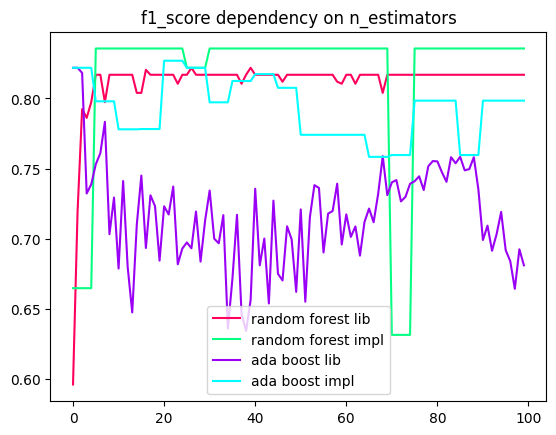

In [42]:
plt.plot(rand_forest_lib_dep, label='random forest lib', c=neon_red)
plt.plot(rand_forest_impl_dep, label='random forest impl', c=mint)
plt.plot(ada_lib_dep, label='ada boost lib', c=ultraviolet)
plt.plot(ada_impl_dep, label='ada boost impl', c=pure_aqua)
plt.title('f1_score dependency on n_estimators')
plt.legend()
plt.show()